In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

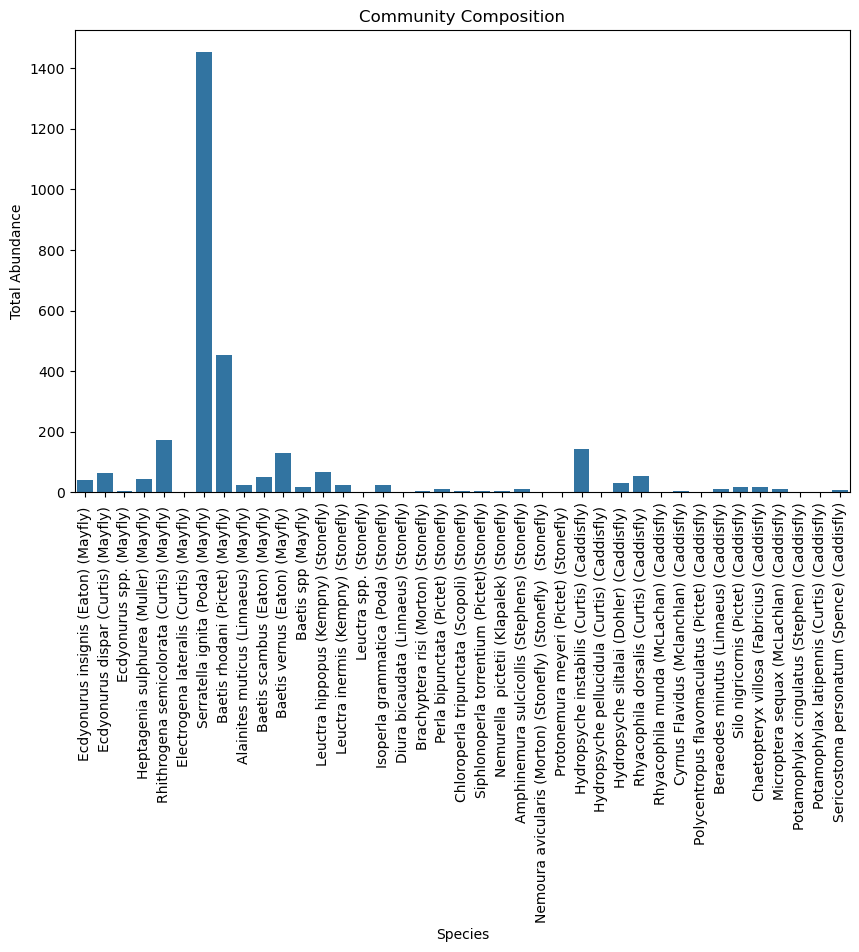

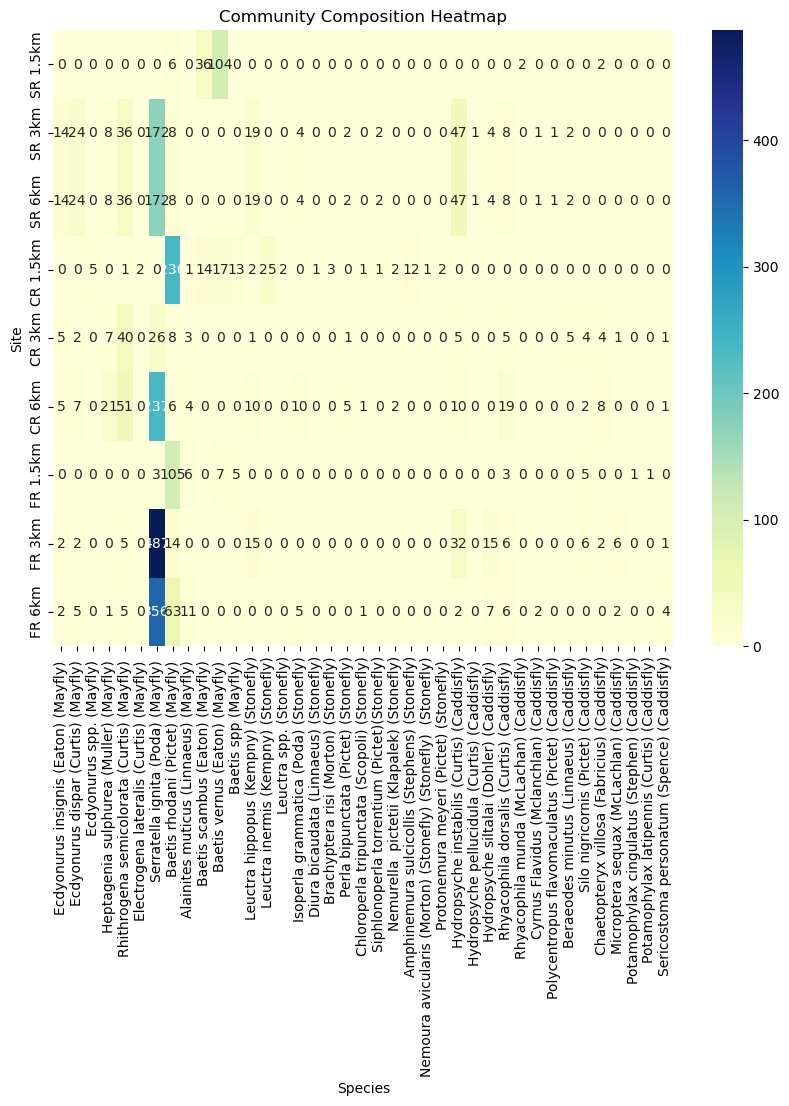

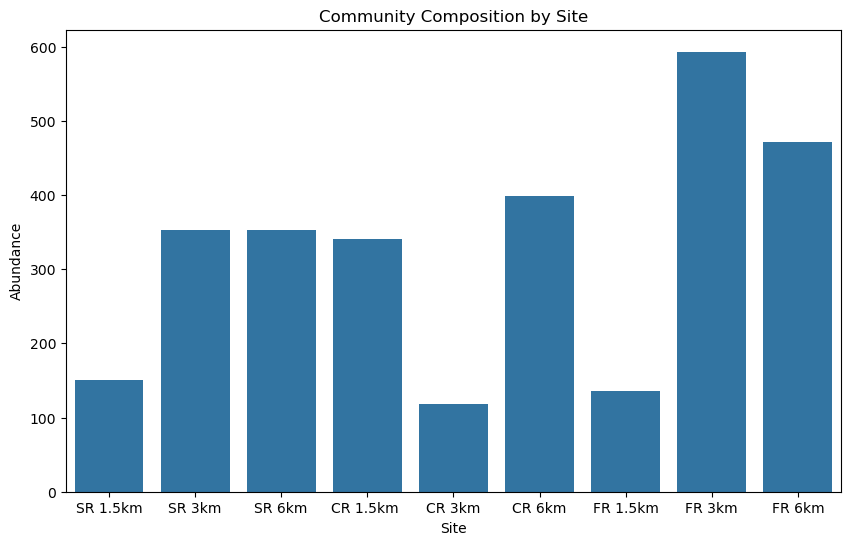

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('species_data2.csv')

# Set the species column as the index
data.set_index('Species', inplace=True)

# Calculate the total abundance for each species
total_abundance = data.sum(axis=1)

# Plot a bar chart of the total abundance
plt.figure(figsize=(10, 6))
sns.barplot(x=total_abundance.index, y=total_abundance.values)
plt.xlabel('Species')
plt.ylabel('Total Abundance')
plt.title('Community Composition')
plt.xticks(rotation=90)
plt.show()

# Calculate the abundance of each species at each site
site_abundance = data.T

# Plot a heatmap of the site abundance
plt.figure(figsize=(10, 8))
sns.heatmap(site_abundance, annot=True, fmt=".0f", cmap="YlGnBu")
plt.xlabel('Species')
plt.ylabel('Site')
plt.title('Community Composition Heatmap')
plt.show()

# Plot a stacked bar chart of the abundance at each site
plt.figure(figsize=(10, 6))
sns.barplot(x=site_abundance.index, y=site_abundance.values.sum(axis=1))
plt.xlabel('Site')
plt.ylabel('Abundance')
plt.title('Community Composition by Site')
plt.show()

In [3]:
# Import necessary libraries
import pandas as pd

# Load the data
data = pd.read_csv('species_data2.csv')

# Select the first 3 rows
first_three_rows = data.head(3)

# Print the first 3 rows
print(first_three_rows)

                                 Species  SR 1.5km  SR 3km  SR 6km  CR 1.5km   \
0  Ecdyonurus insignis (Eaton) (Mayfly)          0      14      14          0   
1   Ecdyonurus dispar (Curtis) (Mayfly)          0      24      24          0   
2              Ecdyonurus spp. (Mayfly)          0       0       0          5   

   CR 3km  CR 6km  FR 1.5km  FR 3km  FR 6km  
0       5       5         0       2       2  
1       2       7         0       2       5  
2       0       0         0       0       0  


Index(['Species', 'SR 1.5km', 'SR 3km', 'SR 6km', 'CR 1.5km ', 'CR 3km',
       'CR 6km', 'FR 1.5km', 'FR 3km', 'FR 6km'],
      dtype='object')


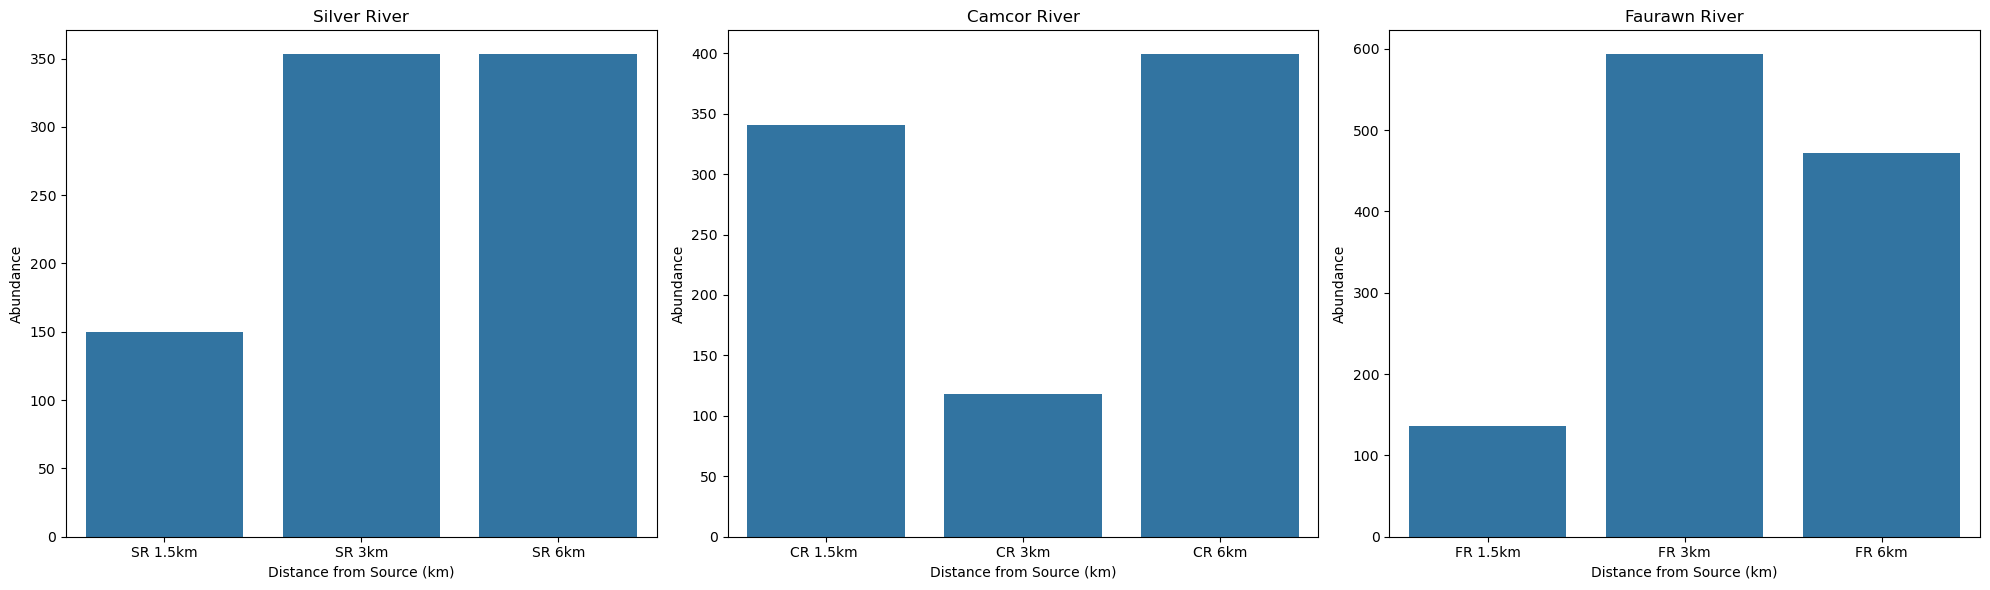

In [4]:
# Import necessary libraries
import pandas as pd

# Load the data
data = pd.read_csv('species_data2.csv')

# Check the actual column names
print(data.columns)

# Separate the data by site (use the actual column names)
silver_river = data[['SR 1.5km', 'SR 3km', 'SR 6km']]
camcor_river = data[['CR 1.5km ', 'CR 3km', 'CR 6km']]  # Check for extra spaces or typos
faurawn_river = data[['FR 1.5km', 'FR 3km', 'FR 6km']]

# Plot a stacked bar chart for each site
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(ax=axes[0], x=silver_river.columns, y=silver_river.sum().values)
axes[0].set_title('Silver River')
axes[0].set_xlabel('Distance from Source (km)')
axes[0].set_ylabel('Abundance')

sns.barplot(ax=axes[1], x=camcor_river.columns, y=camcor_river.sum().values)
axes[1].set_title('Camcor River')
axes[1].set_xlabel('Distance from Source (km)')
axes[1].set_ylabel('Abundance')

sns.barplot(ax=axes[2], x=faurawn_river.columns, y=faurawn_river.sum().values)
axes[2].set_title('Faurawn River')
axes[2].set_xlabel('Distance from Source (km)')
axes[2].set_ylabel('Abundance')

plt.tight_layout()
plt.show()

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import rankdata

# Load the data
data = pd.read_csv('species_data2.csv', index_col='Species')

# Calculate the total abundance for each site
total_abundance = data.sum(axis=0)

# Calculate the Shannon diversity index
shannon_diversity = []
for site in data.columns:
    site_data = data[site]
    site_data = site_data[site_data > 0]
    shannon_index = -np.sum(site_data / total_abundance[site] * np.log(site_data / total_abundance[site]))
    shannon_diversity.append(shannon_index)

# Calculate the Simpson diversity index
simpson_diversity = []
for site in data.columns:
    site_data = data[site]
    site_data = site_data[site_data > 0]
    simpson_index = 1 - np.sum((site_data / total_abundance[site]) ** 2)
    simpson_diversity.append(simpson_index)

# Print the biodiversity indices
print('Shannon Diversity Index:')
for i, site in enumerate(data.columns):
    print(f'{site}: {shannon_diversity[i]}')

print('\nSimpson Diversity Index:')
for i, site in enumerate(data.columns):
    print(f'{site}: {simpson_diversity[i]}')

Shannon Diversity Index:
SR 1.5km: 0.8403254218780503
SR 3km: 1.8164597305976928
SR 6km: 1.8164597305976928
CR 1.5km : 1.3260603343229638
CR 3km: 2.1394656762054343
CR 6km: 1.6009167281996455
FR 1.5km: 0.9735091689592495
FR 3km: 0.8417977235000396
FR 6km: 0.9907215123207299

Simpson Diversity Index:
SR 1.5km: 0.4597333333333332
SR 3km: 0.7234469420346845
SR 6km: 0.7234469420346845
CR 1.5km : 0.5082687627385385
CR 3km: 0.8177247917265154
CR 6km: 0.6225086525838406
FR 1.5km: 0.3955449826989619
FR 3km: 0.32038765928525326
FR 6km: 0.4118967250790002


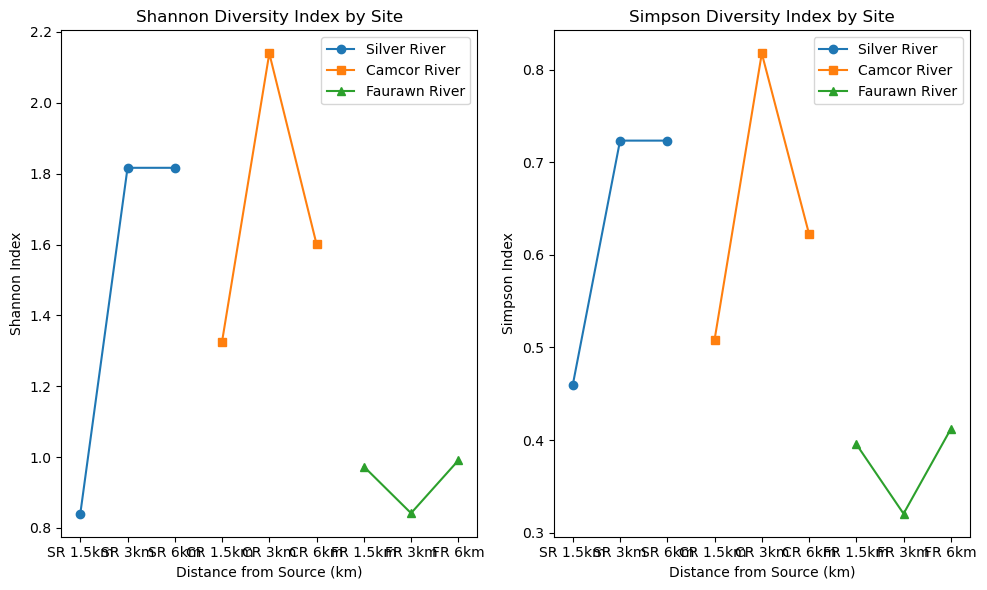

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('species_data2.csv', index_col='Species')

# Separate the data by site
silver_river = data[['SR 1.5km', 'SR 3km', 'SR 6km']]
camcor_river = data[['CR 1.5km ', 'CR 3km', 'CR 6km']]
faurawn_river = data[['FR 1.5km', 'FR 3km', 'FR 6km']]

# Calculate the Shannon diversity index for each site
shannon_silver_river = []
shannon_camcor_river = []
shannon_faurawn_river = []

for site in silver_river.columns:
    site_data = silver_river[site]
    site_data = site_data[site_data > 0]
    shannon_index = -np.sum(site_data / silver_river[site].sum() * np.log(site_data / silver_river[site].sum()))
    shannon_silver_river.append(shannon_index)

for site in camcor_river.columns:
    site_data = camcor_river[site]
    site_data = site_data[site_data > 0]
    shannon_index = -np.sum(site_data / camcor_river[site].sum() * np.log(site_data / camcor_river[site].sum()))
    shannon_camcor_river.append(shannon_index)

for site in faurawn_river.columns:
    site_data = faurawn_river[site]
    site_data = site_data[site_data > 0]
    shannon_index = -np.sum(site_data / faurawn_river[site].sum() * np.log(site_data / faurawn_river[site].sum()))
    shannon_faurawn_river.append(shannon_index)

# Calculate the Simpson diversity index for each site
simpson_silver_river = []
simpson_camcor_river = []
simpson_faurawn_river = []

for site in silver_river.columns:
    site_data = silver_river[site]
    site_data = site_data[site_data > 0]
    simpson_index = 1 - np.sum((site_data / silver_river[site].sum()) ** 2)
    simpson_silver_river.append(simpson_index)

for site in camcor_river.columns:
    site_data = camcor_river[site]
    site_data = site_data[site_data > 0]
    simpson_index = 1 - np.sum((site_data / camcor_river[site].sum()) ** 2)
    simpson_camcor_river.append(simpson_index)

for site in faurawn_river.columns:
    site_data = faurawn_river[site]
    site_data = site_data[site_data > 0]
    simpson_index = 1 - np.sum((site_data / faurawn_river[site].sum()) ** 2)
    simpson_faurawn_river.append(simpson_index)

# Plot the diversity indices
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(silver_river.columns, shannon_silver_river, label='Silver River', marker='o')
plt.plot(camcor_river.columns, shannon_camcor_river, label='Camcor River', marker='s')
plt.plot(faurawn_river.columns, shannon_faurawn_river, label='Faurawn River', marker='^')
plt.xlabel('Distance from Source (km)')
plt.ylabel('Shannon Index')
plt.title('Shannon Diversity Index by Site')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(silver_river.columns, simpson_silver_river, label='Silver River', marker='o')
plt.plot(camcor_river.columns, simpson_camcor_river, label='Camcor River', marker='s')
plt.plot(faurawn_river.columns, simpson_faurawn_river, label='Faurawn River', marker='^')
plt.xlabel('Distance from Source (km)')
plt.ylabel('Simpson Index')
plt.title('Simpson Diversity Index by Site')
plt.legend()

plt.tight_layout()
plt.show()

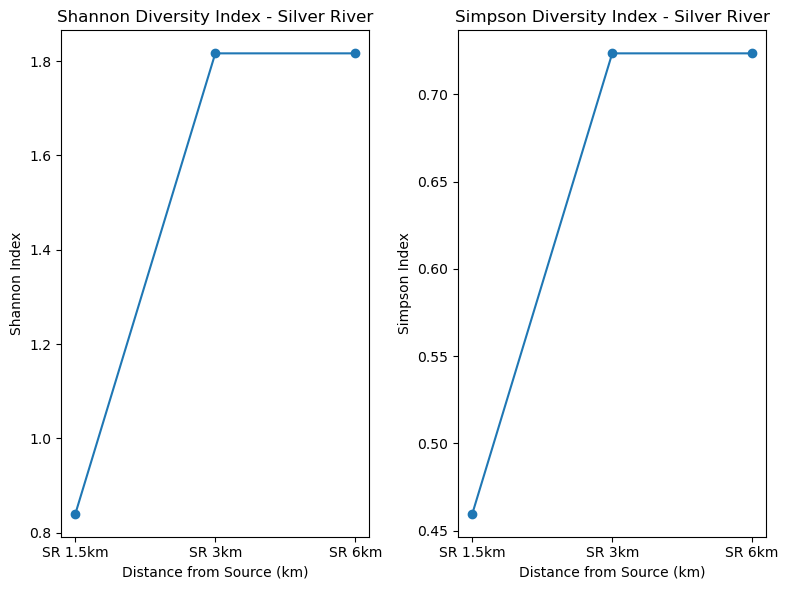

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('species_data2.csv', index_col='Species')

# Separate the data for Silver River
silver_river = data[['SR 1.5km', 'SR 3km', 'SR 6km']]

# Calculate the Shannon diversity index
shannon_silver_river = []
for site in silver_river.columns:
    site_data = silver_river[site]
    site_data = site_data[site_data > 0]
    shannon_index = -np.sum(site_data / silver_river[site].sum() * np.log(site_data / silver_river[site].sum()))
    shannon_silver_river.append(shannon_index)

# Calculate the Simpson diversity index
simpson_silver_river = []
for site in silver_river.columns:
    site_data = silver_river[site]
    site_data = site_data[site_data > 0]
    simpson_index = 1 - np.sum((site_data / silver_river[site].sum()) ** 2)
    simpson_silver_river.append(simpson_index)

# Plot the diversity indices
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.plot(silver_river.columns, shannon_silver_river, marker='o')
plt.xlabel('Distance from Source (km)')
plt.ylabel('Shannon Index')
plt.title('Shannon Diversity Index - Silver River')

plt.subplot(1, 2, 2)
plt.plot(silver_river.columns, simpson_silver_river, marker='o')
plt.xlabel('Distance from Source (km)')
plt.ylabel('Simpson Index')
plt.title('Simpson Diversity Index - Silver River')

plt.tight_layout()
plt.show()

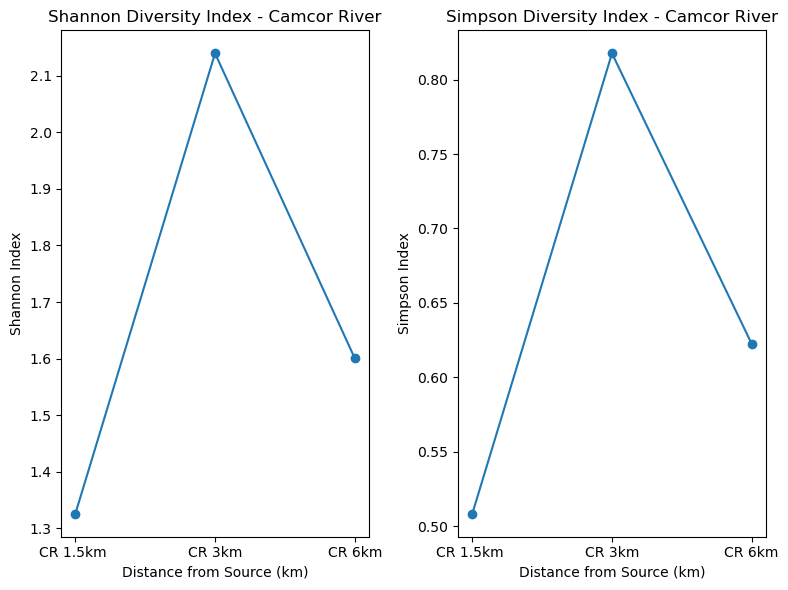

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('species_data2.csv', index_col='Species')

# Separate the data for Camcor River
camcor_river = data[['CR 1.5km ', 'CR 3km', 'CR 6km']]

# Calculate the Shannon diversity index
shannon_camcor_river = []
for site in camcor_river.columns:
    site_data = camcor_river[site]
    site_data = site_data[site_data > 0]
    shannon_index = -np.sum(site_data / camcor_river[site].sum() * np.log(site_data / camcor_river[site].sum()))
    shannon_camcor_river.append(shannon_index)

# Calculate the Simpson diversity index
simpson_camcor_river = []
for site in camcor_river.columns:
    site_data = camcor_river[site]
    site_data = site_data[site_data > 0]
    simpson_index = 1 - np.sum((site_data / camcor_river[site].sum()) ** 2)
    simpson_camcor_river.append(simpson_index)

# Plot the diversity indices
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.plot(camcor_river.columns, shannon_camcor_river, marker='o')
plt.xlabel('Distance from Source (km)')
plt.ylabel('Shannon Index')
plt.title('Shannon Diversity Index - Camcor River')

plt.subplot(1, 2, 2)
plt.plot(camcor_river.columns, simpson_camcor_river, marker='o')
plt.xlabel('Distance from Source (km)')
plt.ylabel('Simpson Index')
plt.title('Simpson Diversity Index - Camcor River')

plt.tight_layout()
plt.show()

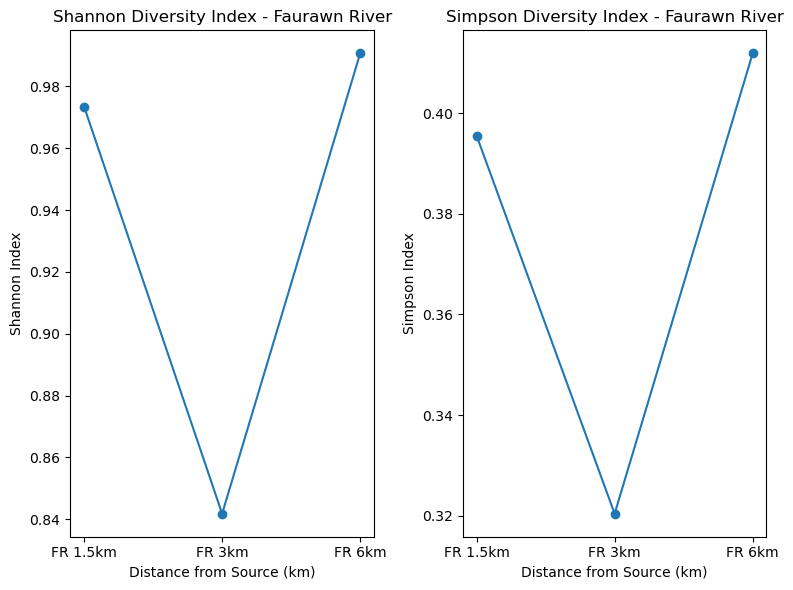

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('species_data2.csv', index_col='Species')

# Separate the data for Faurawn River
faurawn_river = data[['FR 1.5km', 'FR 3km', 'FR 6km']]

# Calculate the Shannon diversity index
shannon_faurawn_river = []
for site in faurawn_river.columns:
    site_data = faurawn_river[site]
    site_data = site_data[site_data > 0]
    shannon_index = -np.sum(site_data / faurawn_river[site].sum() * np.log(site_data / faurawn_river[site].sum()))
    shannon_faurawn_river.append(shannon_index)

# Calculate the Simpson diversity index
simpson_faurawn_river = []
for site in faurawn_river.columns:
    site_data = faurawn_river[site]
    site_data = site_data[site_data > 0]
    simpson_index = 1 - np.sum((site_data / faurawn_river[site].sum()) ** 2)
    simpson_faurawn_river.append(simpson_index)

# Plot the diversity indices
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.plot(faurawn_river.columns, shannon_faurawn_river, marker='o')
plt.xlabel('Distance from Source (km)')
plt.ylabel('Shannon Index')
plt.title('Shannon Diversity Index - Faurawn River')

plt.subplot(1, 2, 2)
plt.plot(faurawn_river.columns, simpson_faurawn_river, marker='o')
plt.xlabel('Distance from Source (km)')
plt.ylabel('Simpson Index')
plt.title('Simpson Diversity Index - Faurawn River')

plt.tight_layout()
plt.show()

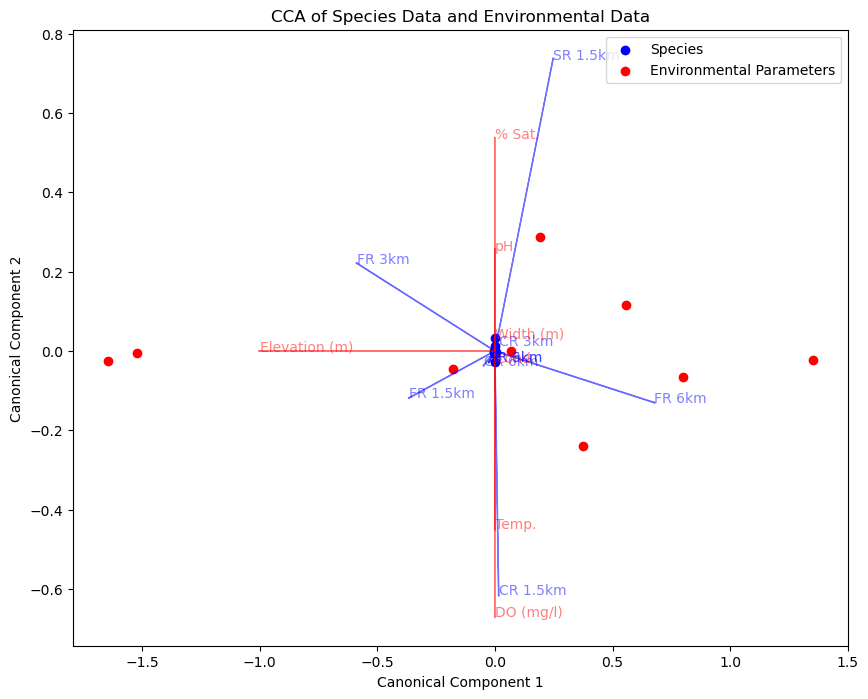

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
species_data = pd.read_csv('species_data2.csv')

# Define environmental data
env_data = pd.DataFrame({
    'Elevation (m)': [350, 240, 160, 360, 220, 180, 210, 195, 115],
    'Width (m)': [2, 3, 5.7, 0.7, 4, 7, 0.7, 1.8, 3],
    'pH': [5.36, 7.97, 8.12, 7.42, 8.24, 7.79, 8.4, 7.88, 8.06],
    'Temp.': [11.2, 15.2, 14.3, 12.8, 16.6, 14.5, 12.1, 16, 15.1],
    'DO (mg/l)': [9.22, 10.07, 10.75, 9.88, 8.93, 10.01, 10.07, 8.8, 9.03],
    '% Sat.': [90, 100.5, 104.1, 95.1, 92.2, 99.6, 95.5, 88.7, 90.3],
    'Cond.': [32, 123, 271, 157, 222, 180, 270, 467, 600]
})

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
species_data_scaled = scaler.fit_transform(species_data.iloc[:, 1:])
env_data_scaled = scaler.fit_transform(env_data)

# Perform CCA
cca = CCA(n_components=2)
cca_species, cca_env = cca.fit_transform(species_data_scaled[:9], env_data_scaled)

# Plot the CCA results
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(cca_species[:, 0], cca_species[:, 1], c='blue', label='Species')
ax.scatter(cca_env[:, 0], cca_env[:, 1], c='red', label='Environmental Parameters')
for i, species in enumerate(species_data.columns[1:]):
    ax.arrow(0, 0, cca.x_weights_[:, 0][i], cca.x_weights_[:, 1][i], color='blue', alpha=0.5)
    ax.text(cca.x_weights_[:, 0][i], cca.x_weights_[:, 1][i], species, color='blue', alpha=0.5)
for i, env in enumerate(env_data.columns):
    ax.arrow(0, 0, cca.y_weights_[:, 0][i], cca.y_weights_[:, 1][i], color='red', alpha=0.5)
    ax.text(cca.y_weights_[:, 0][i], cca.y_weights_[:, 1][i], env, color='red', alpha=0.5)
ax.set_xlabel('Canonical Component 1')
ax.set_ylabel('Canonical Component 2')
ax.set_title('CCA of Species Data and Environmental Data')
ax.legend()
plt.show()

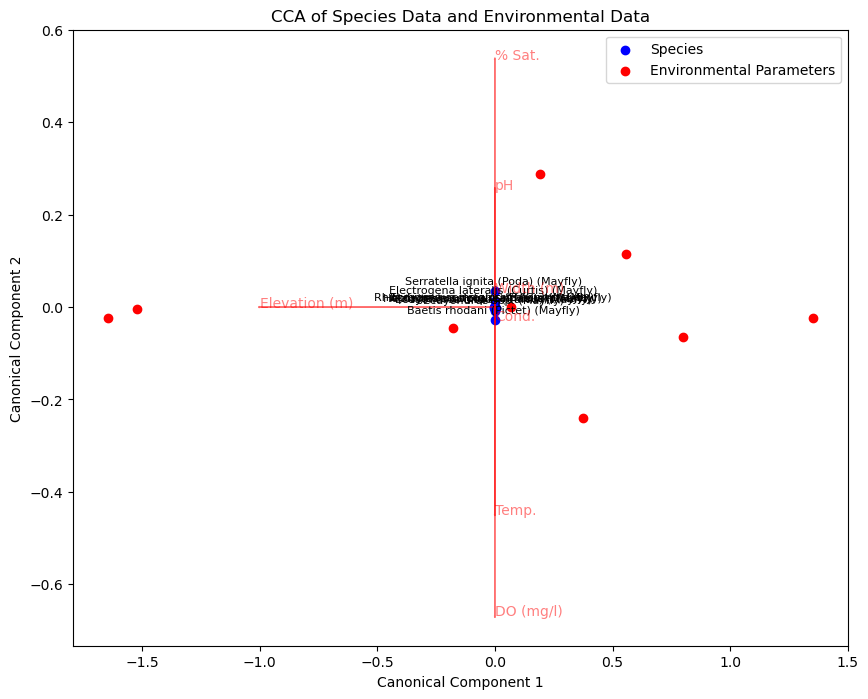

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
species_data = pd.read_csv('species_data2.csv')

# Define environmental data
env_data = pd.DataFrame({
    'Elevation (m)': [350, 240, 160, 360, 220, 180, 210, 195, 115],
    'Width (m)': [2, 3, 5.7, 0.7, 4, 7, 0.7, 1.8, 3],
    'pH': [5.36, 7.97, 8.12, 7.42, 8.24, 7.79, 8.4, 7.88, 8.06],
    'Temp.': [11.2, 15.2, 14.3, 12.8, 16.6, 14.5, 12.1, 16, 15.1],
    'DO (mg/l)': [9.22, 10.07, 10.75, 9.88, 8.93, 10.01, 10.07, 8.8, 9.03],
    '% Sat.': [90, 100.5, 104.1, 95.1, 92.2, 99.6, 95.5, 88.7, 90.3],
    'Cond.': [32, 123, 271, 157, 222, 180, 270, 467, 600]
})

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
species_data_scaled = scaler.fit_transform(species_data.iloc[:, 1:])
env_data_scaled = scaler.fit_transform(env_data)

# Perform CCA
cca = CCA(n_components=2)
cca_species, cca_env = cca.fit_transform(species_data_scaled[:9], env_data_scaled)

# Plot the CCA results
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(cca_species[:, 0], cca_species[:, 1], c='blue', label='Species')
for i, species in enumerate(species_data.iloc[:9, 0]):
    ax.annotate(species, (cca_species[i, 0], cca_species[i, 1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
ax.scatter(cca_env[:, 0], cca_env[:, 1], c='red', label='Environmental Parameters')
for i, env in enumerate(env_data.columns):
    ax.arrow(0, 0, cca.y_weights_[:, 0][i], cca.y_weights_[:, 1][i], color='red', alpha=0.5)
    ax.text(cca.y_weights_[:, 0][i], cca.y_weights_[:, 1][i], env, color='red', alpha=0.5)
ax.set_xlabel('Canonical Component 1')
ax.set_ylabel('Canonical Component 2')
ax.set_title('CCA of Species Data and Environmental Data')
ax.legend()
plt.show()

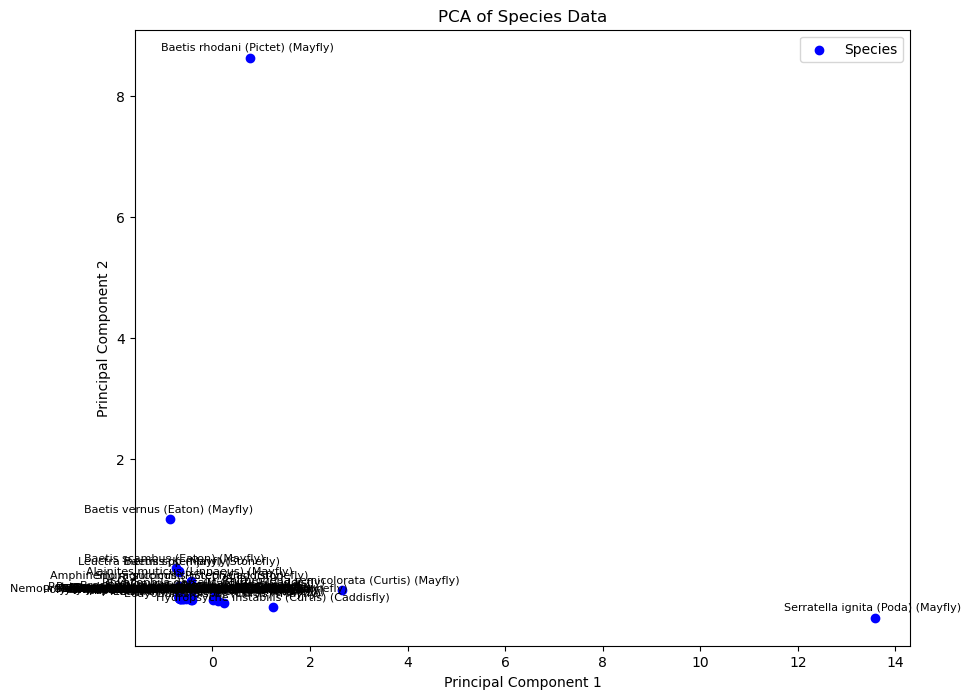

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
species_data = pd.read_csv('species_data2.csv')

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
species_data_scaled = scaler.fit_transform(species_data.iloc[:, 1:])

# Perform PCA
pca = PCA(n_components=2)
pca_species = pca.fit_transform(species_data_scaled)

# Plot the PCA results
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pca_species[:, 0], pca_species[:, 1], c='blue', label='Species')
for i, species in enumerate(species_data.iloc[:, 0]):
    ax.annotate(species, (pca_species[i, 0], pca_species[i, 1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Species Data')
ax.legend()
plt.show()

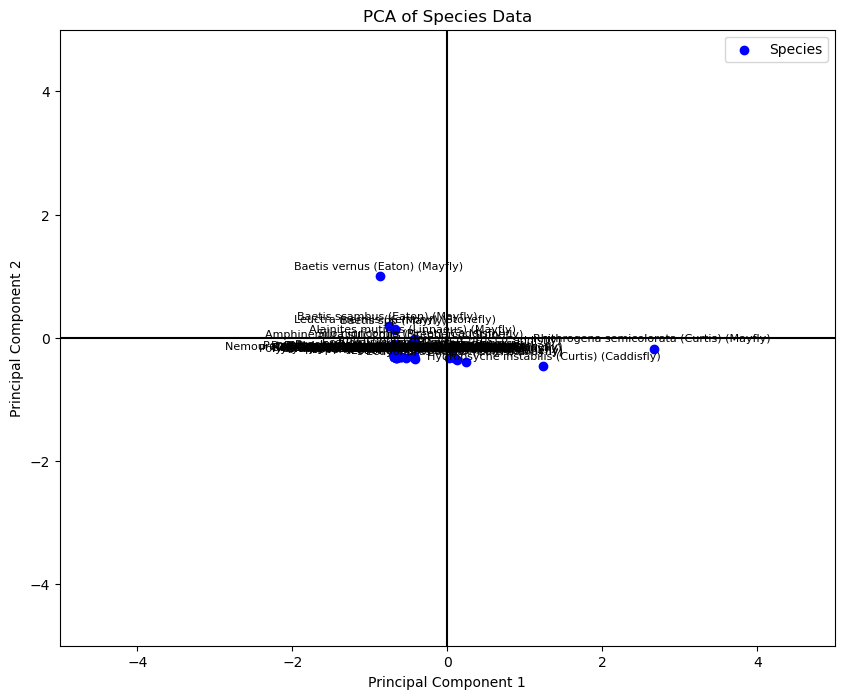

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
species_data = pd.read_csv('species_data2.csv')

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
species_data_scaled = scaler.fit_transform(species_data.iloc[:, 1:])

# Perform PCA
pca = PCA(n_components=2)
pca_species = pca.fit_transform(species_data_scaled)

# Plot the PCA results
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pca_species[:, 0], pca_species[:, 1], c='blue', label='Species')
for i, species in enumerate(species_data.iloc[:, 0]):
    ax.annotate(species, (pca_species[i, 0], pca_species[i, 1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Species Data')
ax.set_xlim(-5, 5) # Set x-axis limits
ax.set_ylim(-5, 5) # Set y-axis limits
ax.axhline(0, color='black') # Add horizontal line at y=0
ax.axvline(0, color='black') # Add vertical line at x=0
ax.legend()
plt.show()

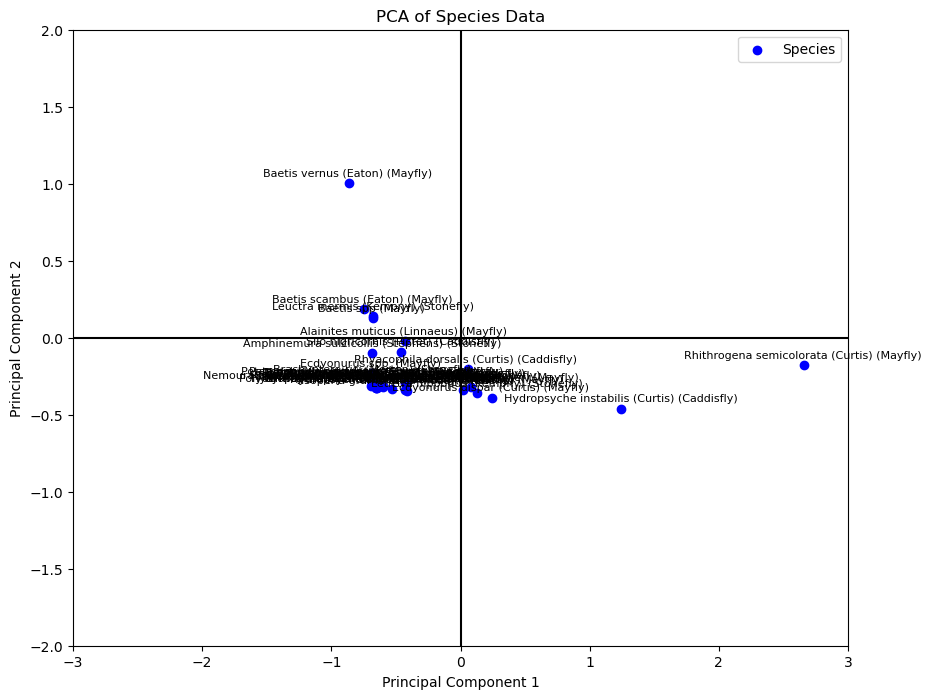

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
species_data = pd.read_csv('species_data2.csv')

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
species_data_scaled = scaler.fit_transform(species_data.iloc[:, 1:])

# Perform PCA
pca = PCA(n_components=2)
pca_species = pca.fit_transform(species_data_scaled)

# Plot the PCA results
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pca_species[:, 0], pca_species[:, 1], c='blue', label='Species')
for i, species in enumerate(species_data.iloc[:, 0]):
    ax.annotate(species, (pca_species[i, 0], pca_species[i, 1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Species Data')
ax.set_xlim(-3, 3) # Set x-axis limits
ax.set_ylim(-2, 2) # Set y-axis limits
ax.axhline(0, color='black') # Add horizontal line at y=0
ax.axvline(0, color='black') # Add vertical line at x=0
ax.legend()
plt.show()

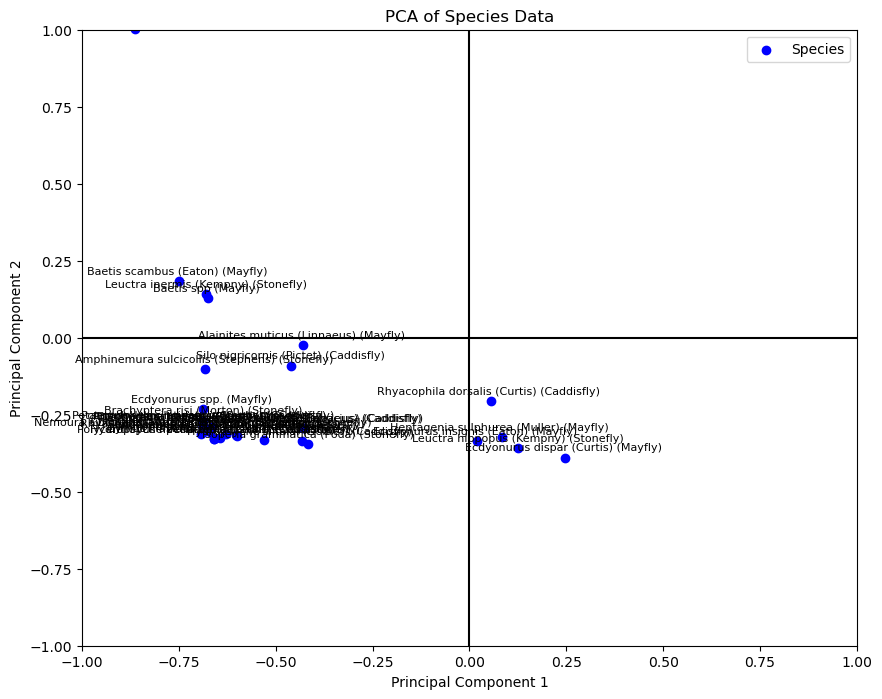

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
species_data = pd.read_csv('species_data2.csv')

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
species_data_scaled = scaler.fit_transform(species_data.iloc[:, 1:])

# Perform PCA
pca = PCA(n_components=2)
pca_species = pca.fit_transform(species_data_scaled)

# Plot the PCA results
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pca_species[:, 0], pca_species[:, 1], c='blue', label='Species')
for i, species in enumerate(species_data.iloc[:, 0]):
    ax.annotate(species, (pca_species[i, 0], pca_species[i, 1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Species Data')
ax.set_xlim(-1, 1) # Set x-axis limits
ax.set_ylim(-1, 1) # Set y-axis limits
ax.axhline(0, color='black') # Add horizontal line at y=0
ax.axvline(0, color='black') # Add vertical line at x=0
ax.legend()
plt.show()

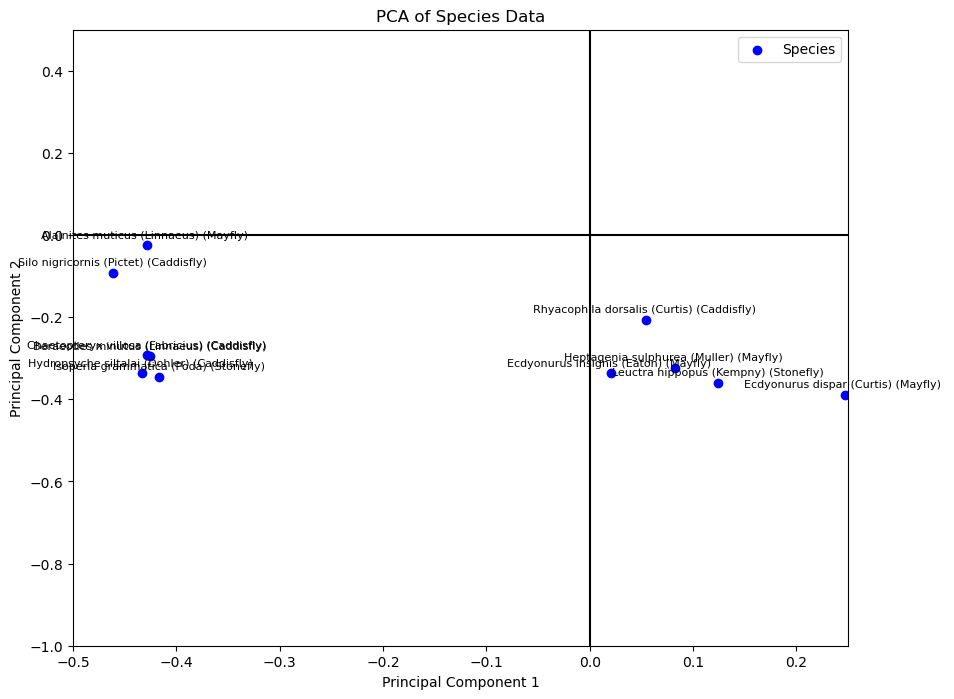

In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
species_data = pd.read_csv('species_data2.csv')

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
species_data_scaled = scaler.fit_transform(species_data.iloc[:, 1:])

# Perform PCA
pca = PCA(n_components=2)
pca_species = pca.fit_transform(species_data_scaled)

# Plot the PCA results
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pca_species[:, 0], pca_species[:, 1], c='blue', label='Species')
for i, species in enumerate(species_data.iloc[:, 0]):
    ax.annotate(species, (pca_species[i, 0], pca_species[i, 1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA of Species Data')
ax.set_xlim(-0.5, 0.25) # Set x-axis limits
ax.set_ylim(-1, 0.5) # Set y-axis limits
ax.axhline(0, color='black') # Add horizontal line at y=0
ax.axvline(0, color='black') # Add vertical line at x=0
ax.legend()
plt.show()

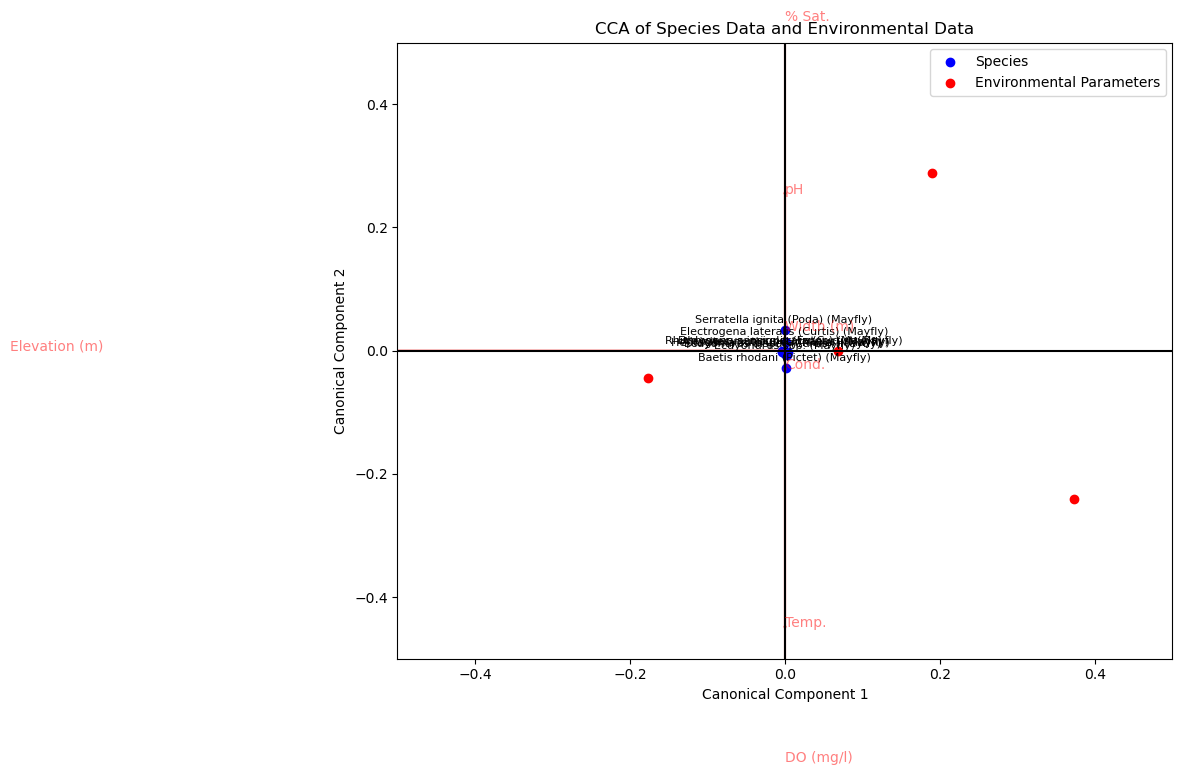

In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
species_data = pd.read_csv('species_data2.csv')

# Define environmental data
env_data = pd.DataFrame({
    'Elevation (m)': [350, 240, 160, 360, 220, 180, 210, 195, 115],
    'Width (m)': [2, 3, 5.7, 0.7, 4, 7, 0.7, 1.8, 3],
    'pH': [5.36, 7.97, 8.12, 7.42, 8.24, 7.79, 8.4, 7.88, 8.06],
    'Temp.': [11.2, 15.2, 14.3, 12.8, 16.6, 14.5, 12.1, 16, 15.1],
    'DO (mg/l)': [9.22, 10.07, 10.75, 9.88, 8.93, 10.01, 10.07, 8.8, 9.03],
    '% Sat.': [90, 100.5, 104.1, 95.1, 92.2, 99.6, 95.5, 88.7, 90.3],
    'Cond.': [32, 123, 271, 157, 222, 180, 270, 467, 600]
})

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
species_data_scaled = scaler.fit_transform(species_data.iloc[:, 1:])
env_data_scaled = scaler.fit_transform(env_data)

# Perform CCA
cca = CCA(n_components=2)
cca_species, cca_env = cca.fit_transform(species_data_scaled[:9], env_data_scaled)

# Plot the CCA results
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(cca_species[:, 0], cca_species[:, 1], c='blue', label='Species')
for i, species in enumerate(species_data.iloc[:9, 0]):
    ax.annotate(species, (cca_species[i, 0], cca_species[i, 1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
ax.scatter(cca_env[:, 0], cca_env[:, 1], c='red', label='Environmental Parameters')
for i, env in enumerate(env_data.columns):
    ax.arrow(0, 0, cca.y_weights_[:, 0][i], cca.y_weights_[:, 1][i], color='red', alpha=0.5)
    ax.text(cca.y_weights_[:, 0][i], cca.y_weights_[:, 1][i], env, color='red', alpha=0.5)
ax.set_xlabel('Canonical Component 1')
ax.set_ylabel('Canonical Component 2')
ax.set_title('CCA of Species Data and Environmental Data')
ax.set_xlim(-0.5, 0.5) # Set x-axis limits
ax.set_ylim(-0.5, 0.5) # Set y-axis limits
ax.axhline(0, color='black') # Add horizontal line at y=0
ax.axvline(0, color='black') # Add vertical line at x=0
ax.legend()
plt.show()

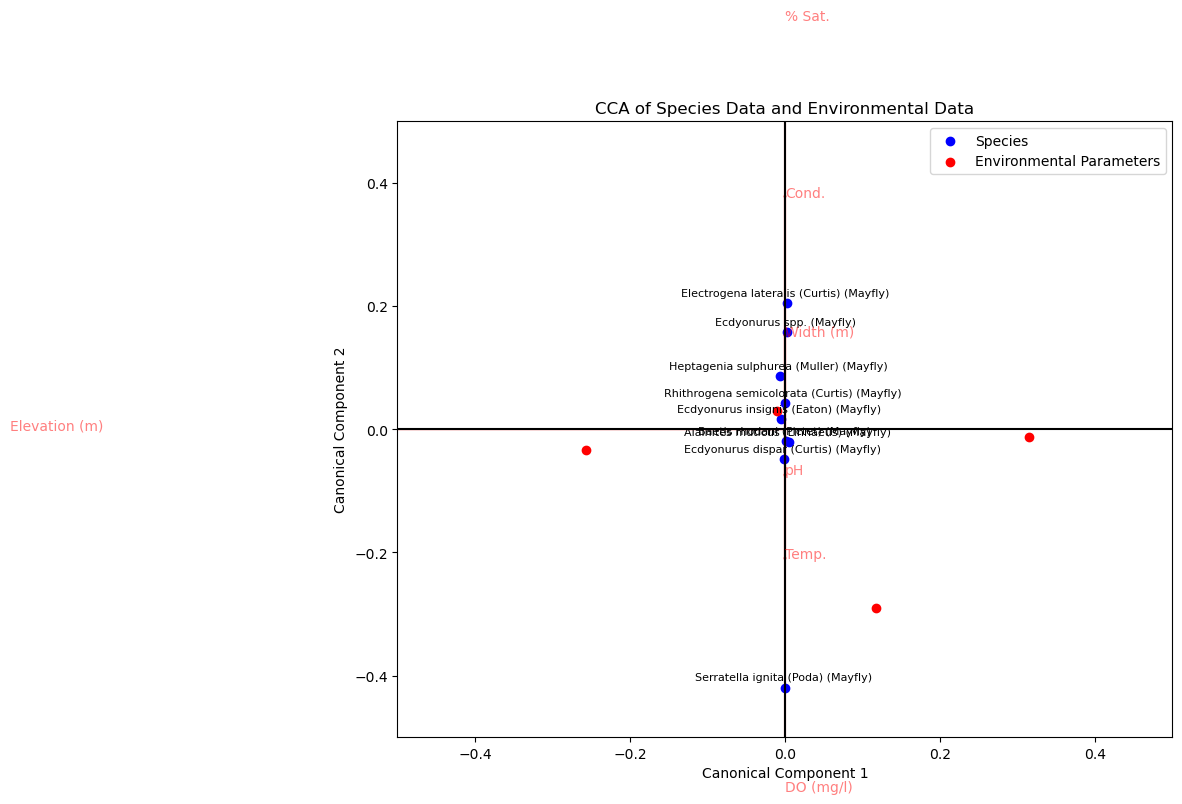

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the data
species_data = pd.read_csv('species_data2.csv')

# Define environmental data
env_data = pd.DataFrame({
    'Elevation (m)': [350, 240, 160, 360, 220, 180, 210, 195, 115],
    'Width (m)': [2, 3, 5.7, 0.7, 4, 7, 0.7, 1.8, 3],
    'pH': [5.36, 7.97, 8.12, 7.42, 8.24, 7.79, 8.4, 7.88, 8.06],
    'Temp.': [11.2, 15.2, 14.3, 12.8, 16.6, 14.5, 12.1, 16, 15.1],
    'DO (mg/l)': [9.22, 10.07, 10.75, 9.88, 8.93, 10.01, 10.07, 8.8, 9.03],
    '% Sat.': [90, 100.5, 104.1, 95.1, 92.2, 99.6, 95.5, 88.7, 90.3],
    'Cond.': [32, 123, 271, 157, 222, 180, 270, 467, 600]
})

# Root transform the environmental data and species data
env_data_transformed = np.sqrt(env_data)
species_data_transformed = np.sqrt(species_data.iloc[:, 1:])

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
env_data_scaled = scaler.fit_transform(env_data_transformed)
species_data_scaled = scaler.fit_transform(species_data_transformed)

# Perform CCA
cca = CCA(n_components=2)
cca_species, cca_env = cca.fit_transform(species_data_scaled[:9], env_data_scaled)

# Plot the CCA results
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(cca_species[:, 0], cca_species[:, 1], c='blue', label='Species')
for i, species in enumerate(species_data.iloc[:9, 0]):
    ax.annotate(species, (cca_species[i, 0], cca_species[i, 1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
ax.scatter(cca_env[:, 0], cca_env[:, 1], c='red', label='Environmental Parameters')
for i, env in enumerate(env_data.columns):
    ax.arrow(0, 0, cca.y_weights_[:, 0][i], cca.y_weights_[:, 1][i], color='red', alpha=0.5)
    ax.text(cca.y_weights_[:, 0][i], cca.y_weights_[:, 1][i], env, color='red', alpha=0.5)
ax.set_xlabel('Canonical Component 1')
ax.set_ylabel('Canonical Component 2')
ax.set_title('CCA of Species Data and Environmental Data')
ax.set_xlim(-0.5, 0.5) # Set x-axis limits
ax.set_ylim(-0.5, 0.5) # Set y-axis limits
ax.axhline(0, color='black') # Add horizontal line at y=0
ax.axvline(0, color='black') # Add vertical line at x=0
ax.legend()
plt.show()

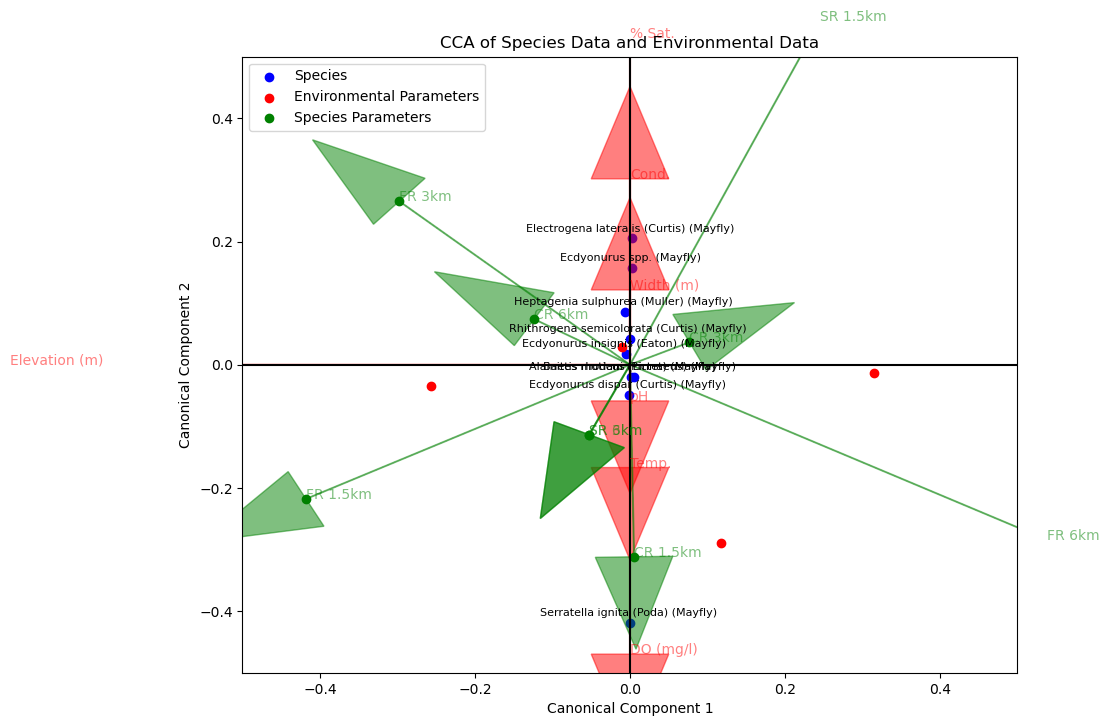

In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the data
species_data = pd.read_csv('species_data2.csv')

# Define environmental data
env_data = pd.DataFrame({
    'Elevation (m)': [350, 240, 160, 360, 220, 180, 210, 195, 115],
    'Width (m)': [2, 3, 5.7, 0.7, 4, 7, 0.7, 1.8, 3],
    'pH': [5.36, 7.97, 8.12, 7.42, 8.24, 7.79, 8.4, 7.88, 8.06],
    'Temp.': [11.2, 15.2, 14.3, 12.8, 16.6, 14.5, 12.1, 16, 15.1],
    'DO (mg/l)': [9.22, 10.07, 10.75, 9.88, 8.93, 10.01, 10.07, 8.8, 9.03],
    '% Sat.': [90, 100.5, 104.1, 95.1, 92.2, 99.6, 95.5, 88.7, 90.3],
    'Cond.': [32, 123, 271, 157, 222, 180, 270, 467, 600]
})

# Root transform the environmental data and species data
env_data_transformed = np.sqrt(env_data)
species_data_transformed = np.sqrt(species_data.iloc[:, 1:])

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
env_data_scaled = scaler.fit_transform(env_data_transformed)
species_data_scaled = scaler.fit_transform(species_data_transformed)

# Perform CCA
cca = CCA(n_components=2)
cca_species, cca_env = cca.fit_transform(species_data_scaled[:9], env_data_scaled)

# Plot the CCA results with biplot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(cca_species[:, 0], cca_species[:, 1], c='blue', label='Species')
for i, species in enumerate(species_data.iloc[:9, 0]):
    ax.annotate(species, (cca_species[i, 0], cca_species[i, 1]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
ax.scatter(cca_env[:, 0], cca_env[:, 1], c='red', label='Environmental Parameters')
for i, env in enumerate(env_data.columns):
    ax.arrow(0, 0, cca.y_weights_[:, 0][i]*0.8, cca.y_weights_[:, 1][i]*0.8, color='red', alpha=0.5, head_width=0.1)
    ax.text(cca.y_weights_[:, 0][i]*0.8, cca.y_weights_[:, 1][i]*0.8, env, color='red', alpha=0.5)
ax.scatter(cca.x_weights_[:, 0]*0.8, cca.x_weights_[:, 1]*0.8, c='green', label='Species Parameters')
for i, species_param in enumerate(species_data.columns[1:]):
    ax.arrow(0, 0, cca.x_weights_[:, 0][i]*0.8, cca.x_weights_[:, 1][i]*0.8, color='green', alpha=0.5, head_width=0.1)
    ax.text(cca.x_weights_[:, 0][i]*0.8, cca.x_weights_[:, 1][i]*0.8, species_param, color='green', alpha=0.5)
ax.set_xlabel('Canonical Component 1')
ax.set_ylabel('Canonical Component 2')
ax.set_title('CCA of Species Data and Environmental Data')
ax.set_xlim(-0.5, 0.5) # Set x-axis limits
ax.set_ylim(-0.5, 0.5) # Set y-axis limits
ax.axhline(0, color='black') # Add horizontal line at y=0
ax.axvline(0, color='black') # Add vertical line at x=0
ax.legend()
plt.show()

Cophenetic Correlation Coefficient:  0.997627534991967


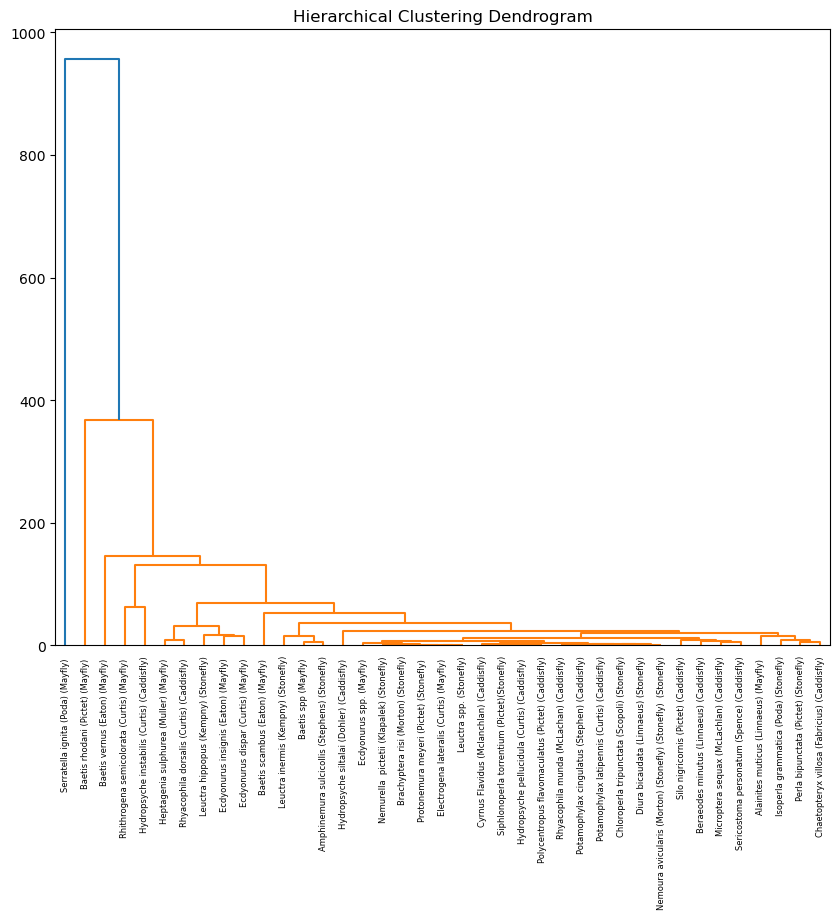

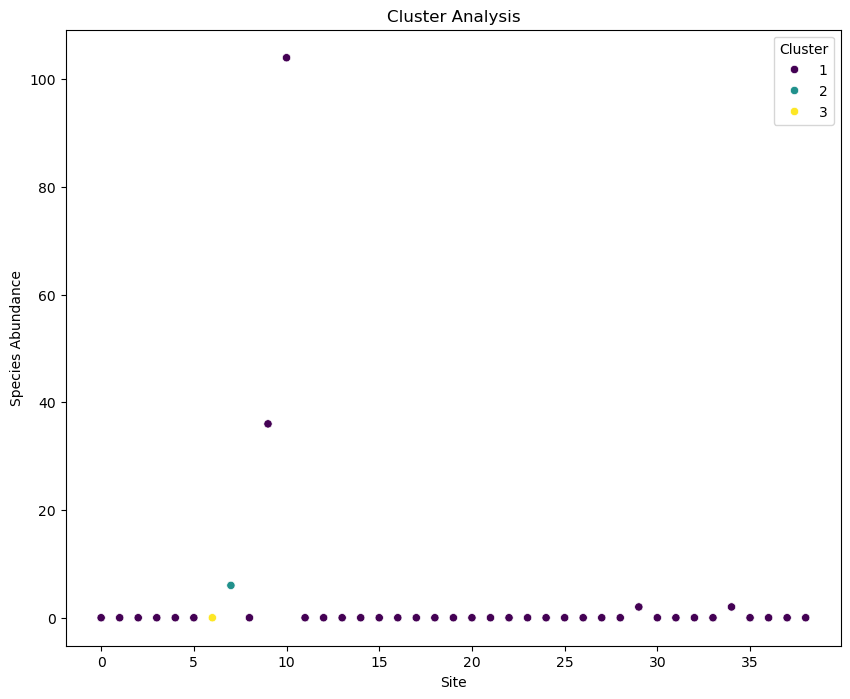

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
import seaborn as sns

# Load the data
species_data = pd.read_csv('species_data2.csv')

# Select the species abundance data
species_abundance = species_data.iloc[:, 1:]

# Calculate the distance matrix
distance_matrix = pdist(species_abundance, metric='euclidean')

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Calculate the cophenetic correlation coefficient
c, coph_dists = cophenet(Z, distance_matrix)
print("Cophenetic Correlation Coefficient: ", c)

# Create a dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z, labels=species_data.iloc[:, 0].values, leaf_rotation=90, leaf_font_size=6)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Determine the number of clusters
k = 3
clusters = fcluster(Z, k, criterion='maxclust')

# Add cluster labels to the species data
species_data['Cluster'] = clusters

# Plot the clusters using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x=np.arange(len(species_data)), y=species_data.iloc[:, 1], hue=species_data['Cluster'], palette='viridis')
plt.title("Cluster Analysis")
plt.xlabel("Site")
plt.ylabel("Species Abundance")
plt.show()

In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the data
species_data = pd.read_csv('species_data2.csv')

# Define environmental data
env_data = pd.DataFrame({
    'Elevation (m)': [350, 240, 160, 360, 220, 180, 210, 195, 115],
    'Width (m)': [2, 3, 5.7, 0.7, 4, 7, 0.7, 1.8, 3],
    'pH': [5.36, 7.97, 8.12, 7.42, 8.24, 7.79, 8.4, 7.88, 8.06],
    'Temp.': [11.2, 15.2, 14.3, 12.8, 16.6, 14.5, 12.1, 16, 15.1],
    'DO (mg/l)': [9.22, 10.07, 10.75, 9.88, 8.93, 10.01, 10.07, 8.8, 9.03],
    '% Sat.': [90, 100.5, 104.1, 95.1, 92.2, 99.6, 95.5, 88.7, 90.3],
    'Cond.': [32, 123, 271, 157, 222, 180, 270, 467, 600]
})

# Define target variable
target = env_data['pH']

# Define feature variables
features = env_data.drop('pH', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions using Random Forest model
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, rf_pred)
print("Random Forest MSE:", rf_mse)

# Train Support Vector Machine model
svm_model = svm.SVR()
svm_model.fit(X_train, y_train)

# Make predictions using Support Vector Machine model
svm_pred = svm_model.predict(X_test)

# Evaluate Support Vector Machine model
svm_mse = mean_squared_error(y_test, svm_pred)
print("Support Vector Machine MSE:", svm_mse)

# Perform hyperparameter tuning for Support Vector Machine model
param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 1, 10]}
grid_search = GridSearchCV(svm.SVR(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Random Forest model on PCA-transformed data
rf_model_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_pca.fit(X_train_pca, y_train)

# Make predictions using Random Forest model on PCA-transformed data
rf_pred_pca = rf_model_pca.predict(X_test_pca)

# Evaluate Random Forest model on PCA-transformed data
rf_mse_pca = mean_squared_error(y_test, rf_pred_pca)
print("Random Forest MSE (PCA):", rf_mse_pca)

Random Forest MSE: 0.0925400450000018
Support Vector Machine MSE: 0.01102007292695099
Best Parameters: {'C': 0.1, 'epsilon': 0.1}
Best Score: nan


C:\Users\owhon\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\owhon\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\owhon\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\owhon\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\owhon\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings

Random Forest MSE (PCA): 0.009741699999999843


In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load the data
species_data = pd.read_csv('species_data2.csv')

# Define environmental data
env_data = pd.DataFrame({
    'Elevation (m)': [350, 240, 160, 360, 220, 180, 210, 195, 115],
    'Width (m)': [2, 3, 5.7, 0.7, 4, 7, 0.7, 1.8, 3],
    'pH': [5.36, 7.97, 8.12, 7.42, 8.24, 7.79, 8.4, 7.88, 8.06],
    'Temp.': [11.2, 15.2, 14.3, 12.8, 16.6, 14.5, 12.1, 16, 15.1],
    'DO (mg/l)': [9.22, 10.07, 10.75, 9.88, 8.93, 10.01, 10.07, 8.8, 9.03],
    '% Sat.': [90, 100.5, 104.1, 95.1, 92.2, 99.6, 95.5, 88.7, 90.3],
    'Cond.': [32, 123, 271, 157, 222, 180, 270, 467, 600]
})

# Define target variable
target = env_data['pH']

# Define feature variables
features = env_data.drop('pH', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions using Random Forest model
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, rf_pred)
print("Random Forest MSE:", rf_mse)

# Train Support Vector Machine model
svm_model = svm.SVR()
svm_model.fit(X_train, y_train)

# Make predictions using Support Vector Machine model
svm_pred = svm_model.predict(X_test)

# Evaluate Support Vector Machine model
svm_mse = mean_squared_error(y_test, svm_pred)
print("Support Vector Machine MSE:", svm_mse)

# Perform hyperparameter tuning for Support Vector Machine model
param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 1, 10]}
grid_search = GridSearchCV(svm.SVR(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Random Forest model on PCA-transformed data
rf_model_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_pca.fit(X_train_pca, y_train)

# Make predictions using Random Forest model on PCA-transformed data
rf_pred_pca = rf_model_pca.predict(X_test_pca)

# Evaluate Random Forest model on PCA-transformed data
rf_mse_pca = mean_squared_error(y_test, rf_pred_pca)
print("Random Forest MSE (PCA):", rf_mse_pca)

Random Forest MSE: 0.0925400450000018
Support Vector Machine MSE: 0.01102007292695099
Best Parameters: {'C': 0.1, 'epsilon': 0.1}
Best Score: nan
Random Forest MSE (PCA): 0.009741699999999843


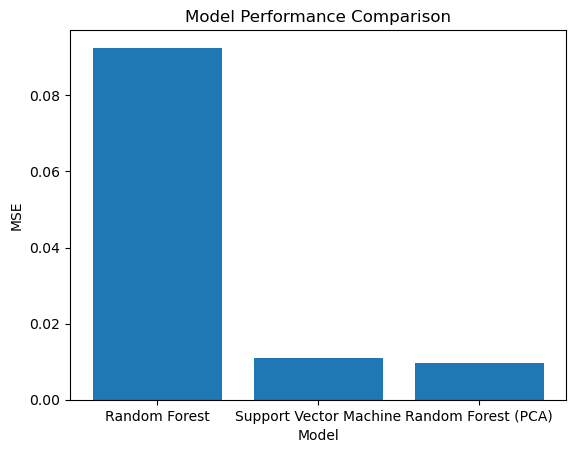

In [23]:
import matplotlib.pyplot as plt

# Define MSE values
mse_values = {
    'Random Forest': 0.0925400450000018,
    'Support Vector Machine': 0.01102007292695099,
    'Random Forest (PCA)': 0.009741699999999843
}

# Create bar chart
plt.bar(mse_values.keys(), mse_values.values())
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Model Performance Comparison')
plt.show()

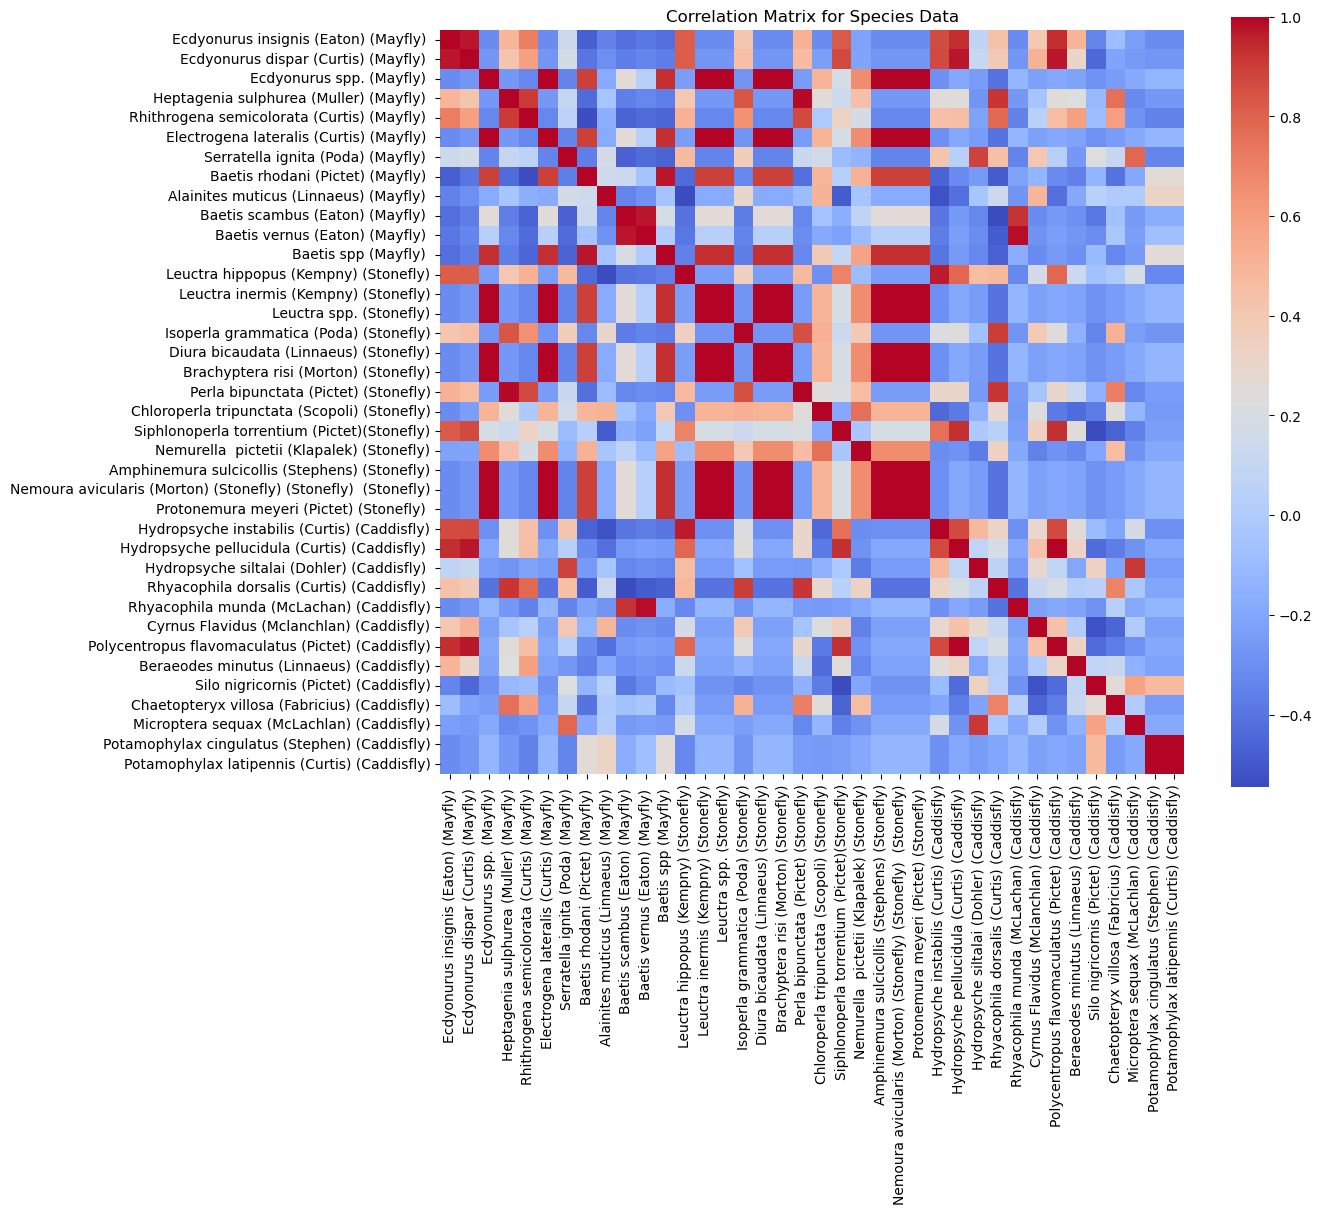

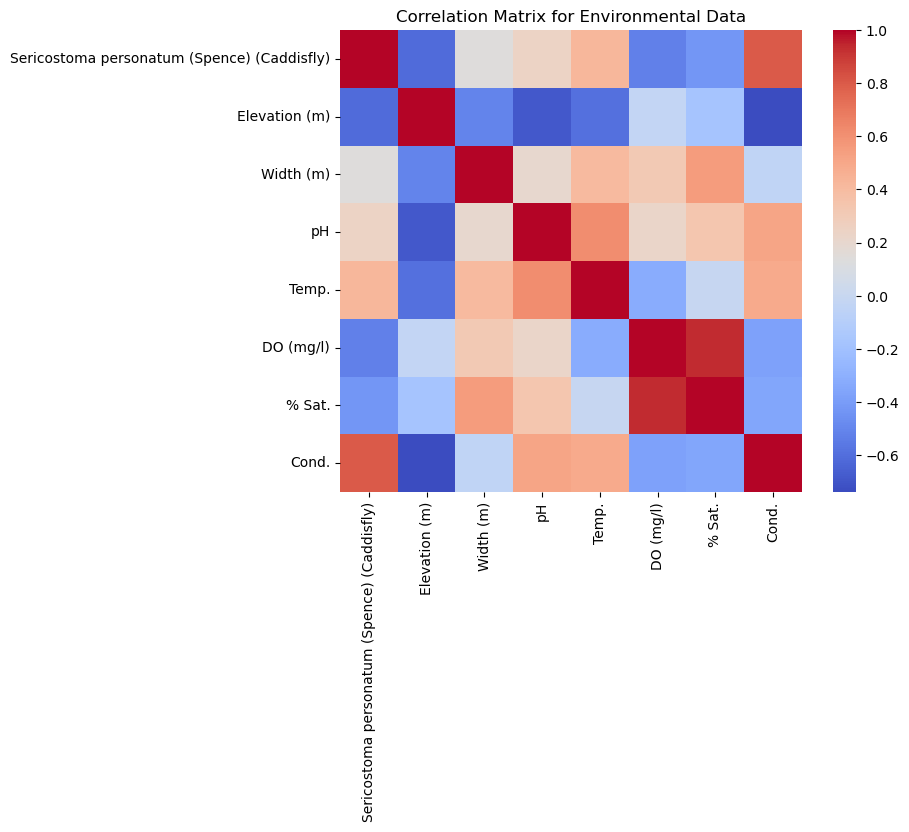

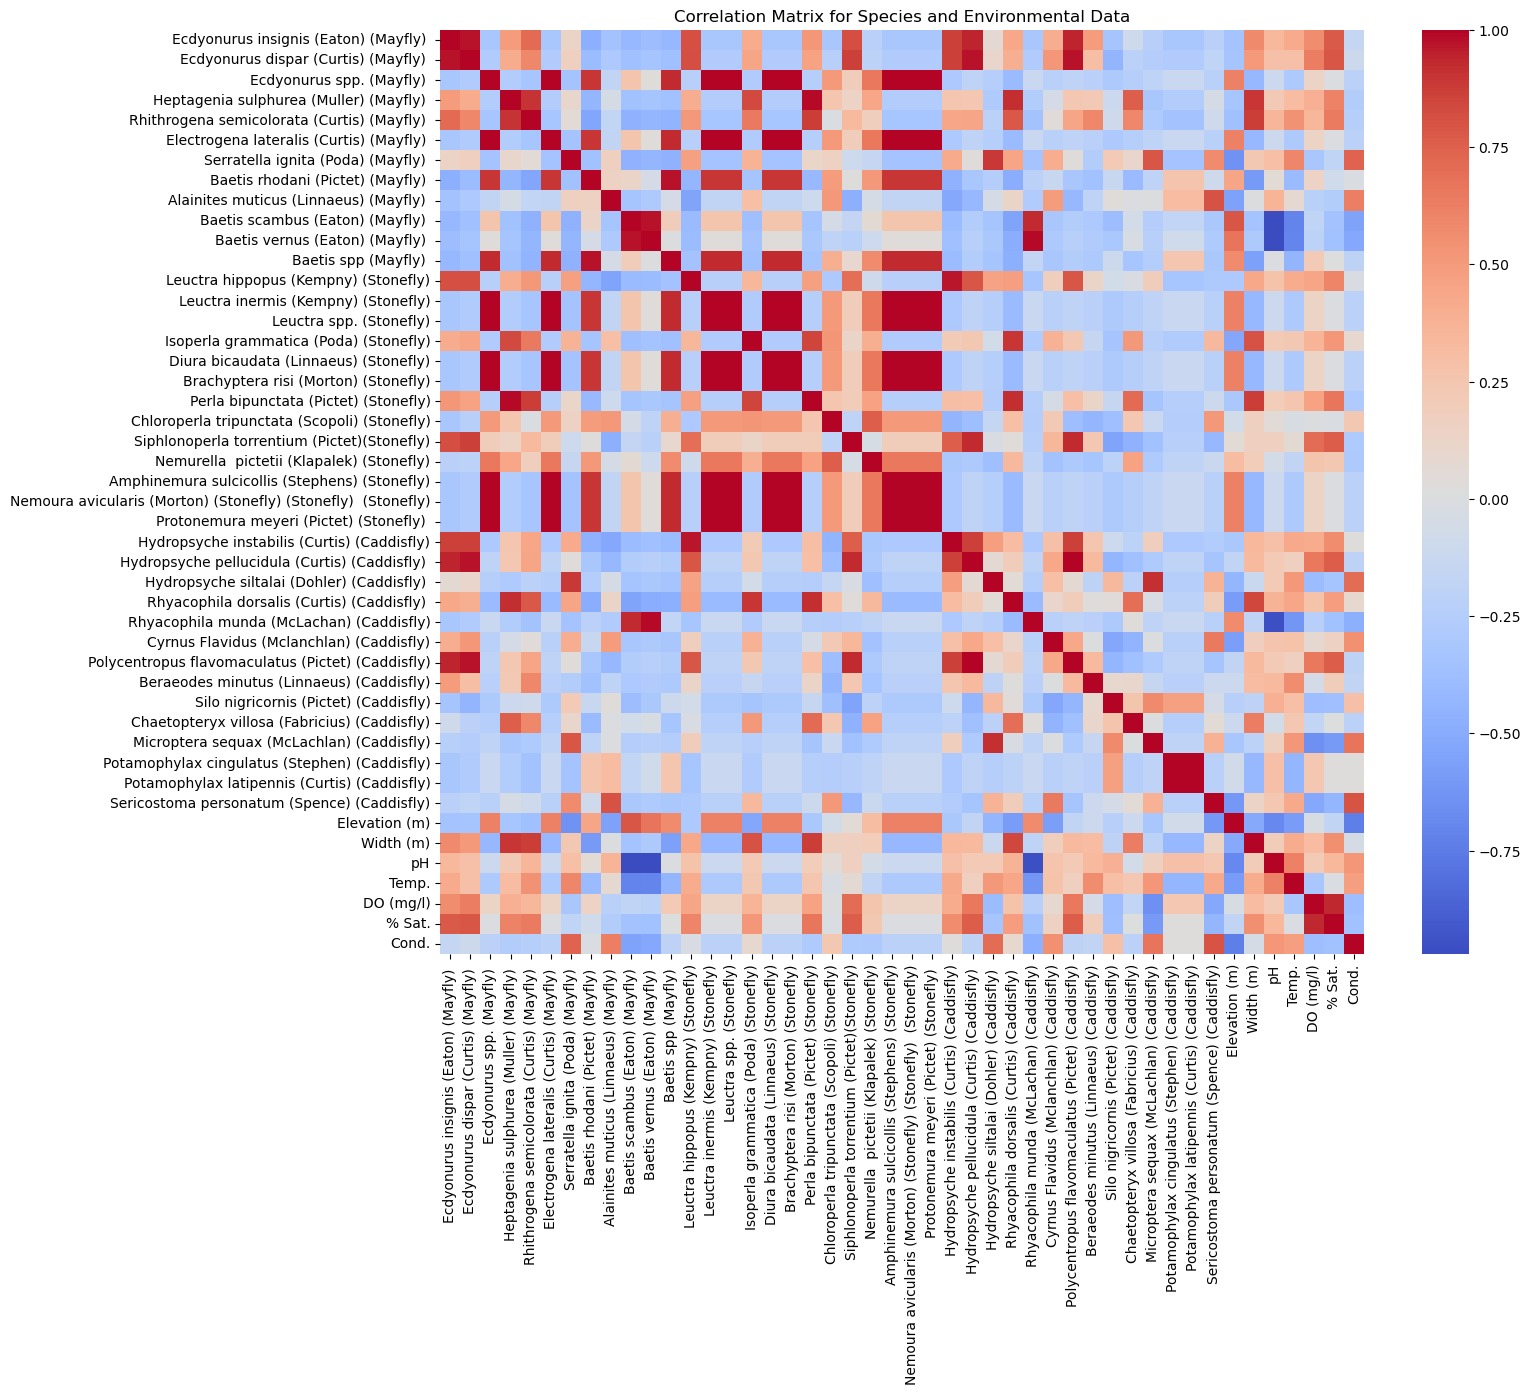

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('new_data.csv')

# Separate the species and environmental data
species_data = data.iloc[:, 1:-8]
env_data = data.iloc[:, -8:]

# Calculate the correlation matrix for species data
species_corr_matrix = species_data.corr()

# Calculate the correlation matrix for environmental data
env_corr_matrix = env_data.corr()

# Create a heatmap for species data
plt.figure(figsize=(12, 10))
sns.heatmap(species_corr_matrix, cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Species Data')
plt.show()

# Create a heatmap for environmental data
plt.figure(figsize=(8, 6))
sns.heatmap(env_corr_matrix, cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Environmental Data')
plt.show()

# Calculate the correlation between species and environmental data
species_env_corr_matrix = pd.concat([species_data, env_data], axis=1).corr()

# Create a heatmap for species and environmental data
plt.figure(figsize=(15, 12))
sns.heatmap(species_env_corr_matrix, cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Species and Environmental Data')
plt.show()

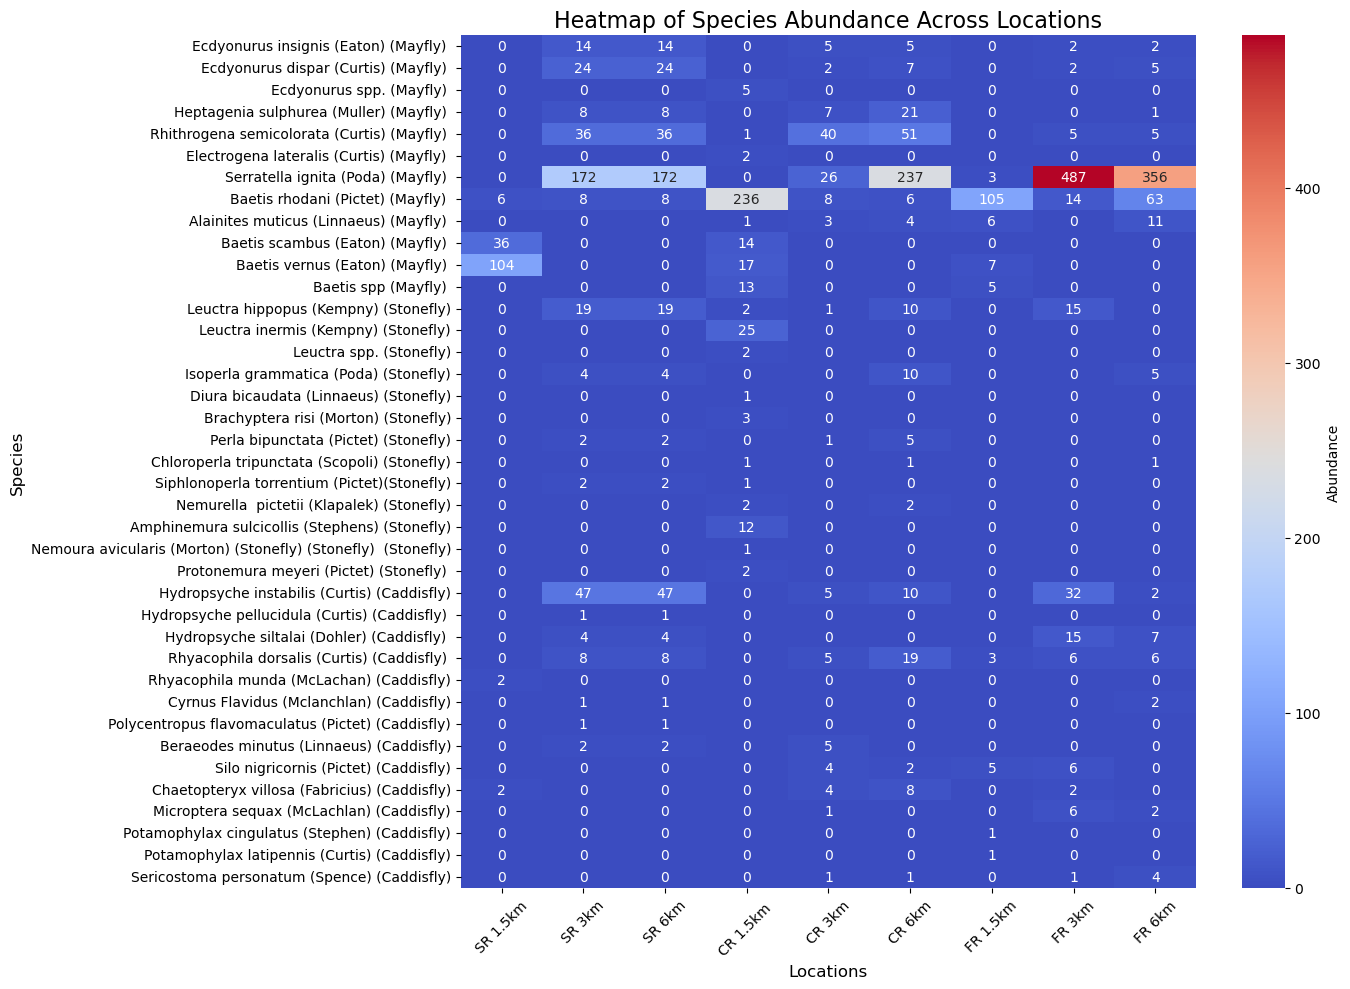

<bound method Series.sort_values of Species
Ecdyonurus insignis (Eaton) (Mayfly)                               42
Ecdyonurus dispar (Curtis) (Mayfly)                                64
Ecdyonurus spp. (Mayfly)                                            5
Heptagenia sulphurea (Muller) (Mayfly)                             45
Rhithrogena semicolorata (Curtis) (Mayfly)                        174
Electrogena lateralis (Curtis) (Mayfly)                             2
Serratella ignita (Poda) (Mayfly)                                1453
Baetis rhodani (Pictet) (Mayfly)                                  454
Alainites muticus (Linnaeus) (Mayfly)                              25
Baetis scambus (Eaton) (Mayfly)                                    50
Baetis vernus (Eaton) (Mayfly)                                    128
Baetis spp (Mayfly)                                                18
Leuctra hippopus (Kempny) (Stonefly)                               66
Leuctra inermis (Kempny) (Stonefly)           

<Figure size 1200x800 with 0 Axes>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_name = 'species_data2.csv'
data = pd.read_csv(file_name)

data.set_index('Species', inplace=True)

data['Total'] = data.sum(axis=1)

plt.figure(figsize=(14, 10))
sns.heatmap(data.iloc[:, :-1], annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': 'Abundance'})
plt.title('Heatmap of Species Abundance Across Locations', fontsize=16)
plt.xlabel('Locations', fontsize=12)
plt.ylabel('Species', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('species_heatmap.png') 
plt.show()

plt.figure(figsize=(12, 8))
data['Total'].sort_values


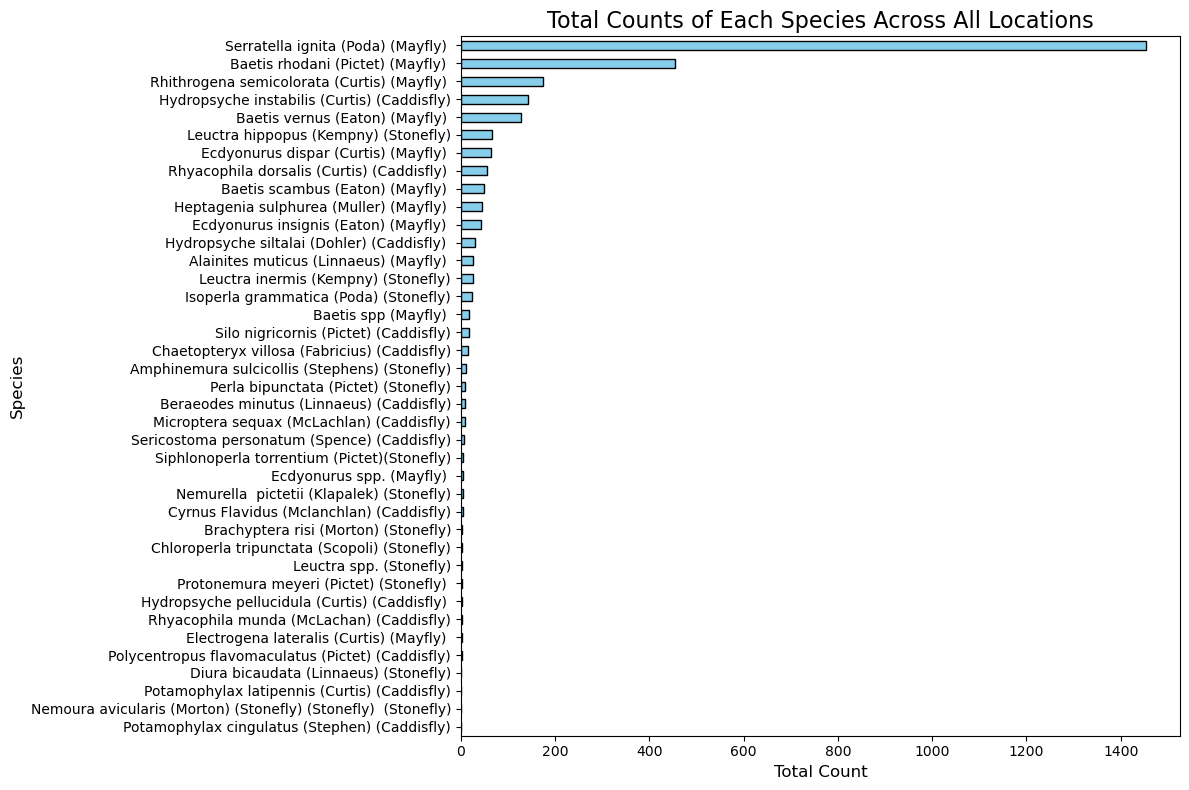

In [45]:

plt.figure(figsize=(12, 8))
data['Total'].sort_values(ascending=True).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Total Counts of Each Species Across All Locations', fontsize=16)
plt.xlabel('Total Count', fontsize=12)
plt.ylabel('Species', fontsize=12)
plt.tight_layout()
plt.savefig('species_total_counts.png')  
plt.show()


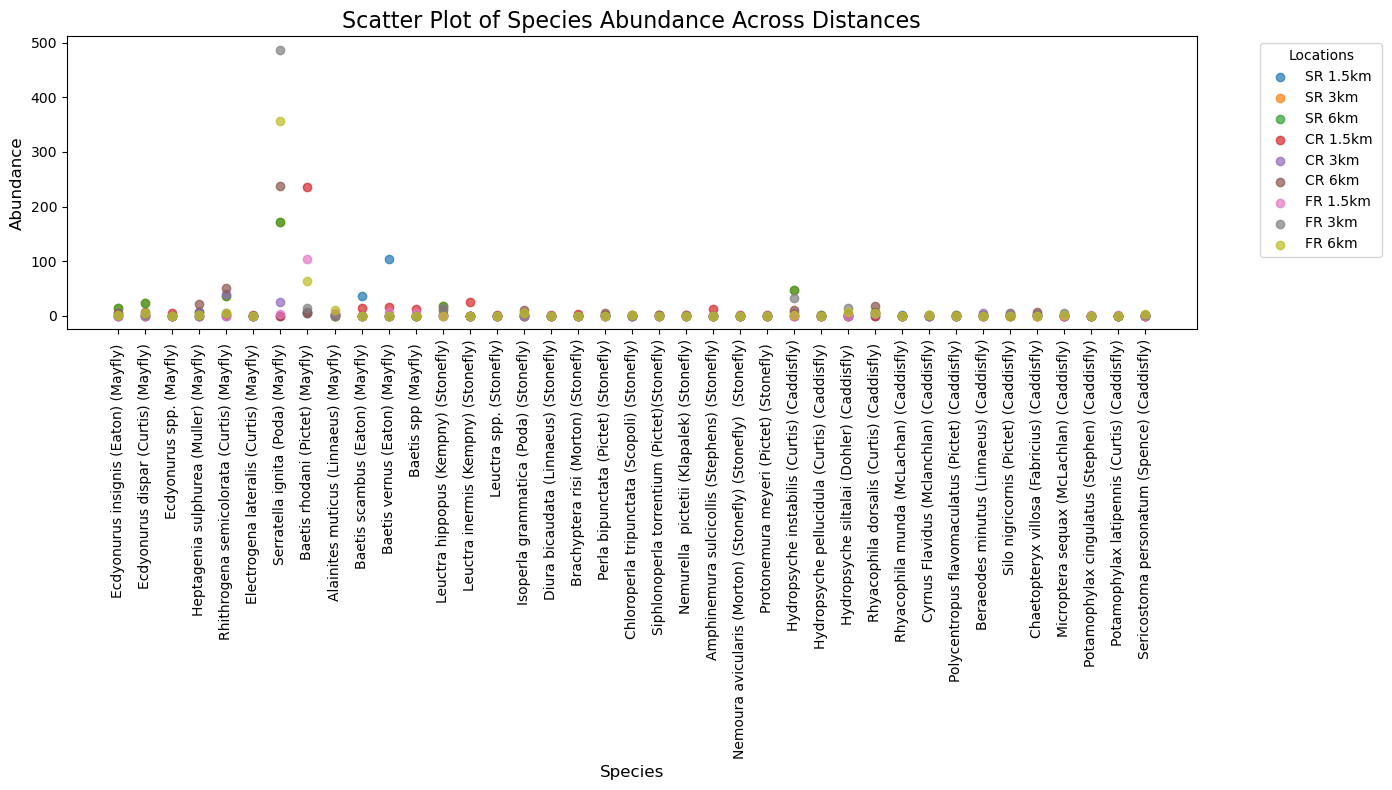

C:\Users\owhon\anaconda3\Lib\site-packages\upsetplot\data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
C:\Users\owhon\anaconda3\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
C:\Users\

NameError: name 'img' is not defined

<Figure size 1200x800 with 0 Axes>

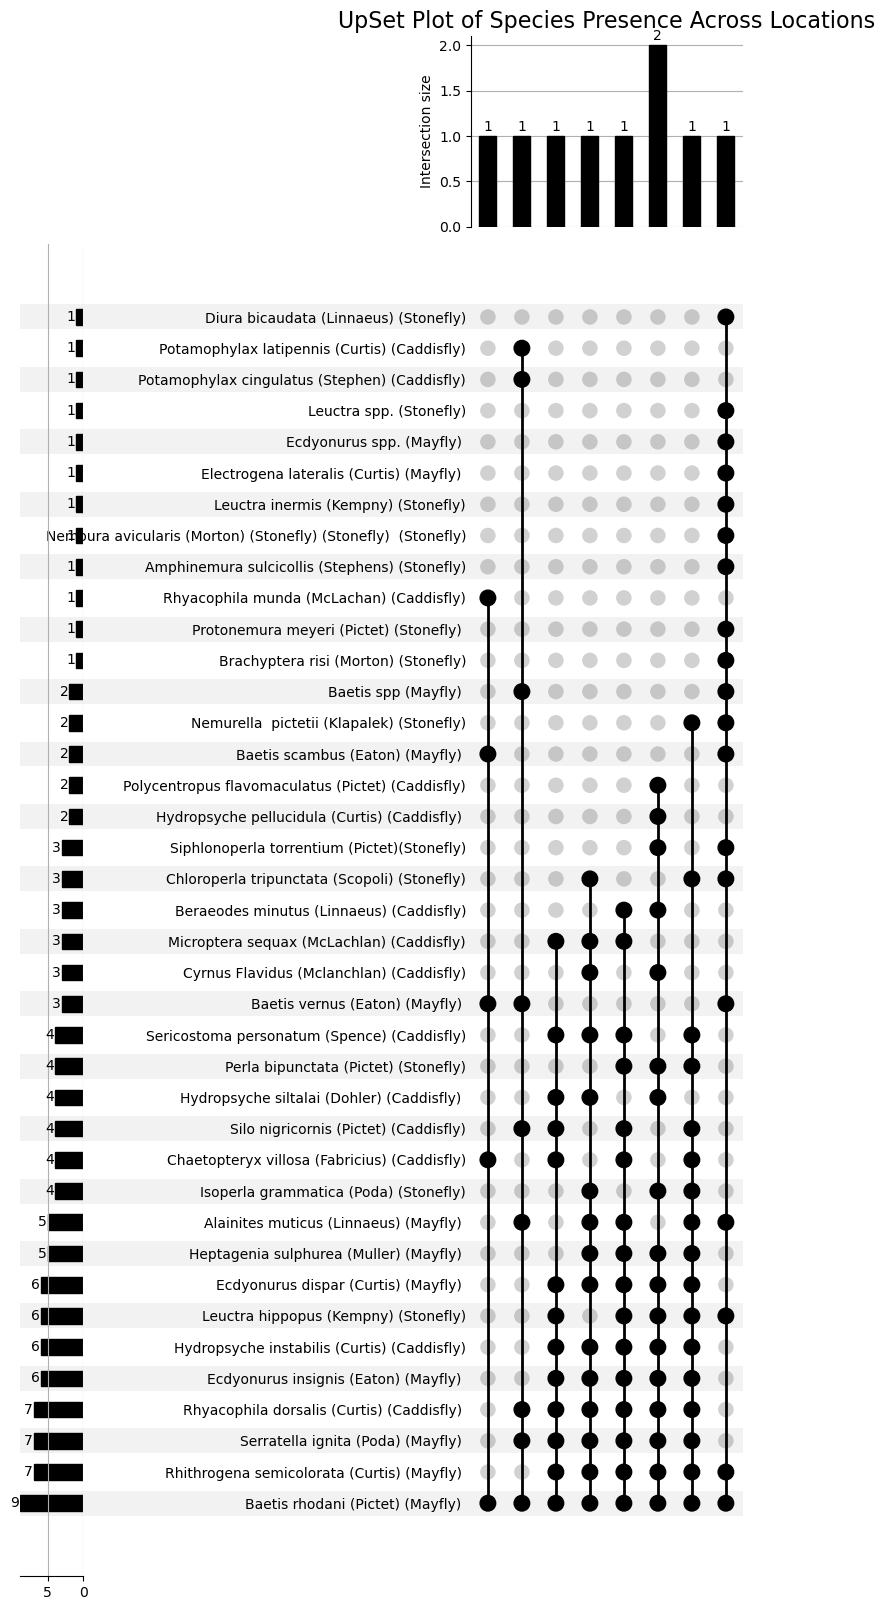

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_contents

# Load the data
file_name = 'species_data2.csv'
data = pd.read_csv(file_name)

# Scatter Plot: Abundance by Distance for Each Species
plt.figure(figsize=(14, 8))
for col in data.columns[1:]:
    plt.scatter(data['Species'], data[col], label=col, alpha=0.7)

plt.title('Scatter Plot of Species Abundance Across Distances', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Abundance', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Locations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('scatter_species_abundance.png')  # Save the scatter plot as an image
plt.show()

# Prepare data for UpSet plot: Species Presence Across Locations
presence_data = {}
for _, row in data.iterrows():
    species = row['Species']
    presence = []
    for col in data.columns[1:]:
        if row[col] > 0:  # Check presence (abundance > 0)
            presence.append(col)
    presence_data[species] = presence

# Create UpSet plot
upset_data = from_contents(presence_data)

plt.figure(figsize=(12, 8))
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.title('UpSet Plot of Species Presence Across Locations', fontsize=16)
plt.tight_layout()
plt.savefig('upset_species_presence.png', dpi=dpi) 

# Set the dpi
dpi = 300


# Save the UpSet plot as an image
plt.show()
